##**Project Assignment**

### Data Collection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df1=pd.read_csv('long_data_.csv')

In [7]:
df1

States Regions   latitude  longitude             Dates  Usage
0         Punjab      NR  31.519974  75.980003  02-01-2019 00:00  119.9
1        Haryana      NR  28.450006  77.019991  02-01-2019 00:00  130.3
2      Rajasthan      NR  26.449999  74.639981  02-01-2019 00:00  234.1
3          Delhi      NR  28.669993  77.230004  02-01-2019 00:00   85.8
4             UP      NR  27.599981  78.050006  02-01-2019 00:00  313.9
...          ...     ...        ...        ...               ...    ...
16594    Manipur     NER  24.799971  93.950017  05-12-2020 00:00    2.5
16595  Meghalaya     NER  25.570492  91.880014  05-12-2020 00:00    5.8
16596    Mizoram     NER  23.710399  92.720015  05-12-2020 00:00    1.6
16597   Nagaland     NER  25.666998  94.116570  05-12-2020 00:00    2.1
16598    Tripura     NER  23.835404  91.279999  05-12-2020 00:00    3.3

[16599 rows x 6 columns]

### Data Preprocessing

In [8]:
df1.isna().sum()

States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
dtype: int64

In [9]:
duplicates = df1[df1.duplicated()]
duplicates

States Regions   latitude  longitude             Dates  Usage
6065  Arunachal Pradesh     NER  27.100399  93.616601  08-07-2019 00:00    1.4
6135            Mizoram     NER  23.710399  92.720015  09-07-2019 00:00    1.4
6196             Sikkim      ER  27.333330  88.616647  10-07-2019 00:00    1.5
6200          Meghalaya     NER  25.570492  91.880014  10-07-2019 00:00    4.1
6201            Mizoram     NER  23.710399  92.720015  10-07-2019 00:00    1.4
6202           Nagaland     NER  25.666998  94.116570  10-07-2019 00:00    1.8
6203            Tripura     NER  23.835404  91.279999  10-07-2019 00:00    2.9
6308        Uttarakhand      NR  30.320409  78.050006  12-07-2019 00:00   34.1
6323              Pondy      SR  11.934994  79.830000  12-07-2019 00:00    7.4
6329  Arunachal Pradesh     NER  27.100399  93.616601  12-07-2019 00:00    2.1
6334           Nagaland     NER  25.666998  94.116570  12-07-2019 00:00    2.1
6335            Tripura     NER  23.835404  91.279999  12-07-2019 00:00    3.5

In [10]:
df1 = df1.drop_duplicates()

### Feature Engineering

In [16]:
df1['Dates'] = pd.to_datetime(df1['Dates'], format="%d-%m-%Y %H:%M")

df1['Year'] = df1['Dates'].dt.year
df1['Month'] = df1['Dates'].dt.month
df1['Quarter'] = df1['Dates'].dt.quarter


day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df1['Day of the Week'] = df1['Dates'].dt.dayofweek.map(day_names)

C:\Users\HP\AppData\Local\Temp\ipykernel_11456\1260167113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Dates'] = pd.to_datetime(df1['Dates'], format="%d-%m-%Y %H:%M")
C:\Users\HP\AppData\Local\Temp\ipykernel_11456\1260167113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = df1['Dates'].dt.year
C:\Users\HP\AppData\Local\Temp\ipykernel_11456\1260167113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [17]:
# Categorize seasons as 'Summer', 'Winter', and 'Rainy' based on the month
def categorize_season(month):
    if month in [3, 4, 5,6]:  # March, April, May,June
        return 'Summer'
    elif month in [7, 8,9]:  #  July, August,September
        return 'Rainy'
    elif month in [10, 11]:  # October, November
        return 'Winter'
    else:  # December, January, February
        return 'Winter'

df1['Season'] = df1['Month'].apply(categorize_season)

C:\Users\HP\AppData\Local\Temp\ipykernel_11456\968106454.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Season'] = df1['Month'].apply(categorize_season)


In [18]:
df1

States Regions   latitude  longitude      Dates  Usage  Year  Month   
0         Punjab      NR  31.519974  75.980003 2019-01-02  119.9  2019      1  \
1        Haryana      NR  28.450006  77.019991 2019-01-02  130.3  2019      1   
2      Rajasthan      NR  26.449999  74.639981 2019-01-02  234.1  2019      1   
3          Delhi      NR  28.669993  77.230004 2019-01-02   85.8  2019      1   
4             UP      NR  27.599981  78.050006 2019-01-02  313.9  2019      1   
...          ...     ...        ...        ...        ...    ...   ...    ...   
16594    Manipur     NER  24.799971  93.950017 2020-12-05    2.5  2020     12   
16595  Meghalaya     NER  25.570492  91.880014 2020-12-05    5.8  2020     12   
16596    Mizoram     NER  23.710399  92.720015 2020-12-05    1.6  2020     12   
16597   Nagaland     NER  25.666998  94.116570 2020-12-05    2.1  2020     12   
16598    Tripura     NER  23.835404  91.279999 2020-12-05    3.3  2020     12   

       Quarter Day of the Week  Season  
0            1       Wednesday  Winter  
1            1       Wednesday  Winter  
2            1       Wednesday  Winter  
3            1       Wednesday  Winter  
4            1       Wednesday  Winter  
...        ...             ...     ...  
16594        4        Saturday  Winter  
16595        4        Saturday  Winter  
16596        4        Saturday  Winter  
16597        4        Saturday  Winter  
16598        4        Saturday  Winter  

[16587 rows x 11 columns]

In [19]:
df1 = pd.get_dummies(df1, columns=['Regions'])

In [20]:
df1.head()

States   latitude  longitude      Dates  Usage  Year  Month  Quarter   
0     Punjab  31.519974  75.980003 2019-01-02  119.9  2019      1        1  \
1    Haryana  28.450006  77.019991 2019-01-02  130.3  2019      1        1   
2  Rajasthan  26.449999  74.639981 2019-01-02  234.1  2019      1        1   
3      Delhi  28.669993  77.230004 2019-01-02   85.8  2019      1        1   
4         UP  27.599981  78.050006 2019-01-02  313.9  2019      1        1   

  Day of the Week  Season  Regions_ER  Regions_NER  Regions_NR  Regions_SR   
0       Wednesday  Winter       False        False        True       False  \
1       Wednesday  Winter       False        False        True       False   
2       Wednesday  Winter       False        False        True       False   
3       Wednesday  Winter       False        False        True       False   
4       Wednesday  Winter       False        False        True       False   

   Regions_WR  
0       False  
1       False  
2       False  
3       False  
4       False

### EDA

Distribution of usage over time for the entire country

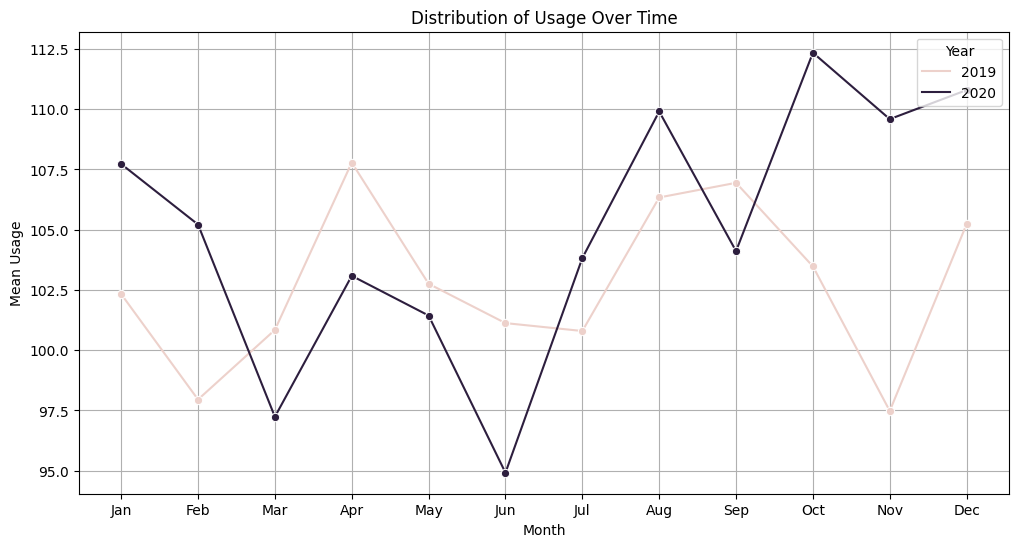

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

usage_by_month = df1.groupby(['Year', 'Month'])['Usage'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=usage_by_month, x='Month', y='Usage', hue='Year', marker='o')
plt.title('Distribution of Usage Over Time')
plt.xlabel('Month')
plt.ylabel('Mean Usage')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.show()

*October month has highest usage*

In [22]:
average_monthly_usage_state = df1.groupby(['States','Year','Month'])['Usage'].mean().reset_index()
average_quarterly_usage_state = df1.groupby(['States','Year','Month','Quarter'])['Usage'].mean().reset_index()
average_yearly_usage_state = df1.groupby(['States','Year'])['Usage'].mean().reset_index()

In [23]:
print("Average Monthly Usage for Each State:")
average_monthly_usage_state

Average Monthly Usage for Each State:


States  Year  Month       Usage
0    Andhra Pradesh  2019      1  168.520000
1    Andhra Pradesh  2019      2  167.566667
2    Andhra Pradesh  2019      3  174.460000
3    Andhra Pradesh  2019      4  188.268966
4    Andhra Pradesh  2019      5  168.410000
..              ...   ...    ...         ...
787     West Bengal  2020      8  156.840000
788     West Bengal  2020      9  113.220000
789     West Bengal  2020     10  155.620000
790     West Bengal  2020     11  159.820000
791     West Bengal  2020     12  154.540000

[792 rows x 4 columns]

In [24]:
print("\nAverage Yearly Usage for Each State:")
average_yearly_usage_state


Average Yearly Usage for Each State:


States  Year       Usage
0      Andhra Pradesh  2019  175.757660
1      Andhra Pradesh  2020  177.134722
2   Arunachal Pradesh  2019    2.102241
3   Arunachal Pradesh  2020    2.131250
4               Assam  2019   25.012256
..                ...   ...         ...
61                 UP  2020  314.377778
62        Uttarakhand  2019   35.934358
63        Uttarakhand  2020   36.725000
64        West Bengal  2019  138.910028
65        West Bengal  2020  138.204861

[66 rows x 3 columns]

In [25]:
print("\nAverage Quarterly Usage for Each State:")
average_quarterly_usage_state


Average Quarterly Usage for Each State:


States  Year  Month  Quarter       Usage
0    Andhra Pradesh  2019      1        1  168.520000
1    Andhra Pradesh  2019      2        1  167.566667
2    Andhra Pradesh  2019      3        1  174.460000
3    Andhra Pradesh  2019      4        2  188.268966
4    Andhra Pradesh  2019      5        2  168.410000
..              ...   ...    ...      ...         ...
787     West Bengal  2020      8        3  156.840000
788     West Bengal  2020      9        3  113.220000
789     West Bengal  2020     10        4  155.620000
790     West Bengal  2020     11        4  159.820000
791     West Bengal  2020     12        4  154.540000

[792 rows x 5 columns]

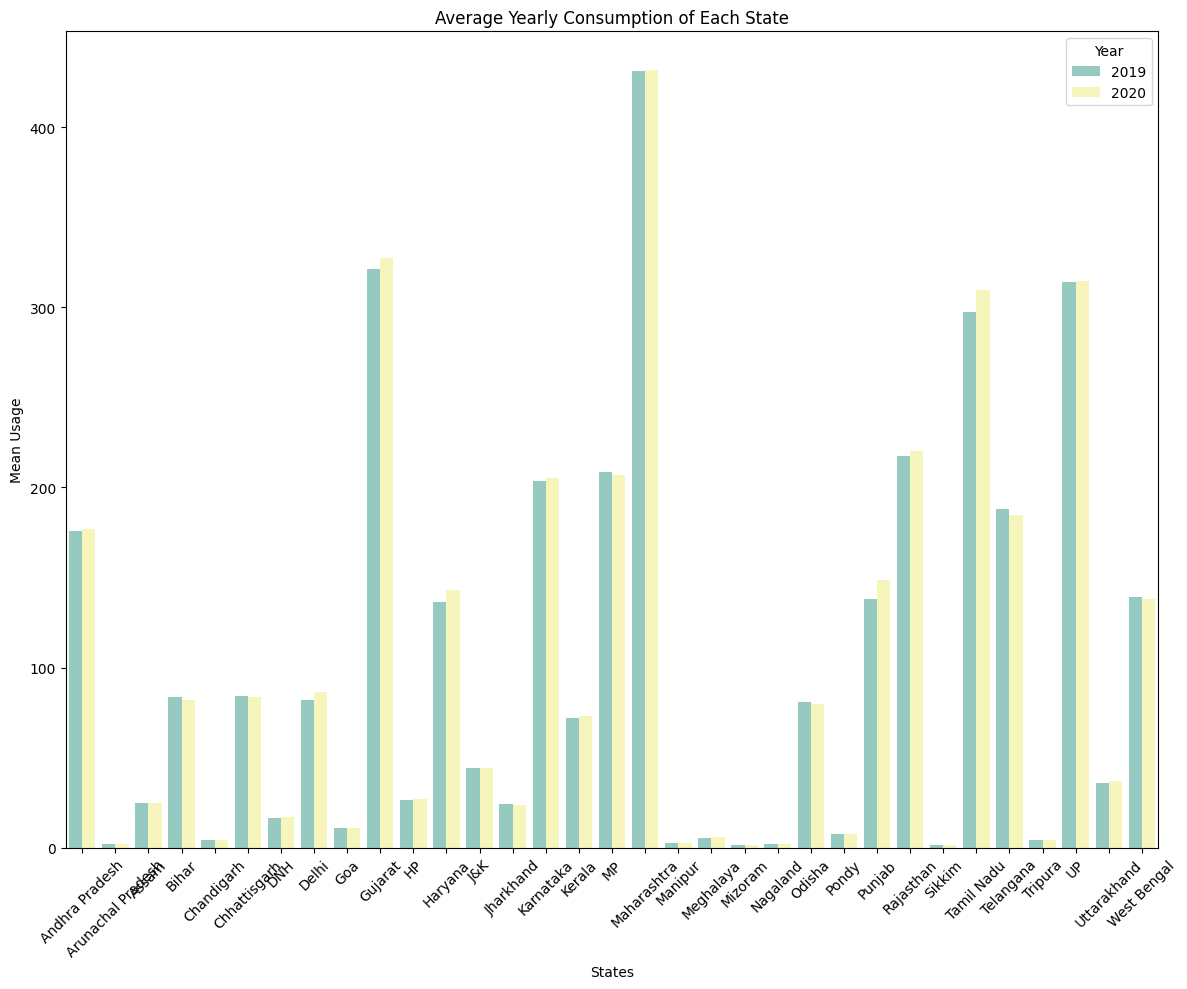

In [26]:
fig, axes = plt.subplots(1, 1, figsize=(12, 10))

# Plot yearly consumption for each State
sns.barplot(data=average_yearly_usage_state, x='States', y='Usage', hue='Year', palette='Set3', ax=axes)
axes.set_title('Average Yearly Consumption of Each State')
axes.set_xlabel('States')
axes.set_ylabel('Mean Usage')

# Rotate x-axis labels for better readability
axes.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


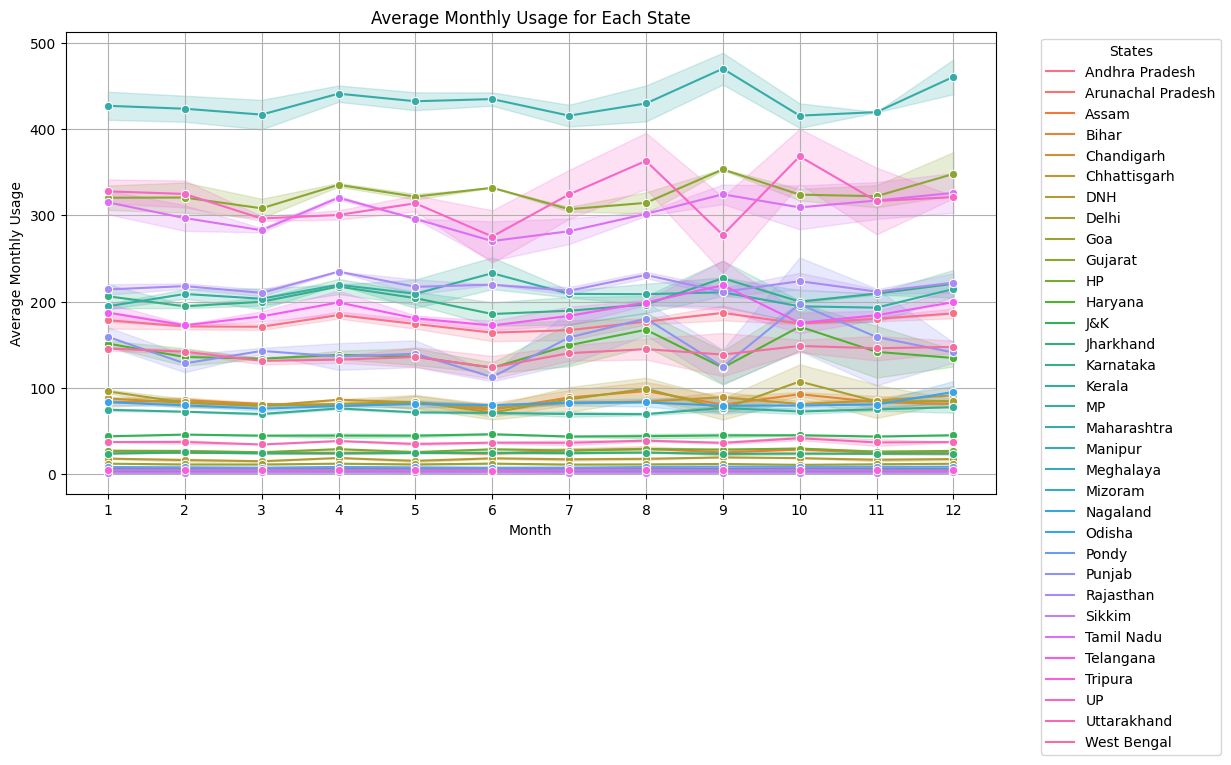

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_monthly_usage_state, x='Month', y='Usage', hue='States', marker='o')
plt.title('Average Monthly Usage for Each State')
plt.xlabel('Month')
plt.ylabel('Average Monthly Usage')
plt.legend(title='States', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

*Maharastra has the highest yearly and monthly consumption*

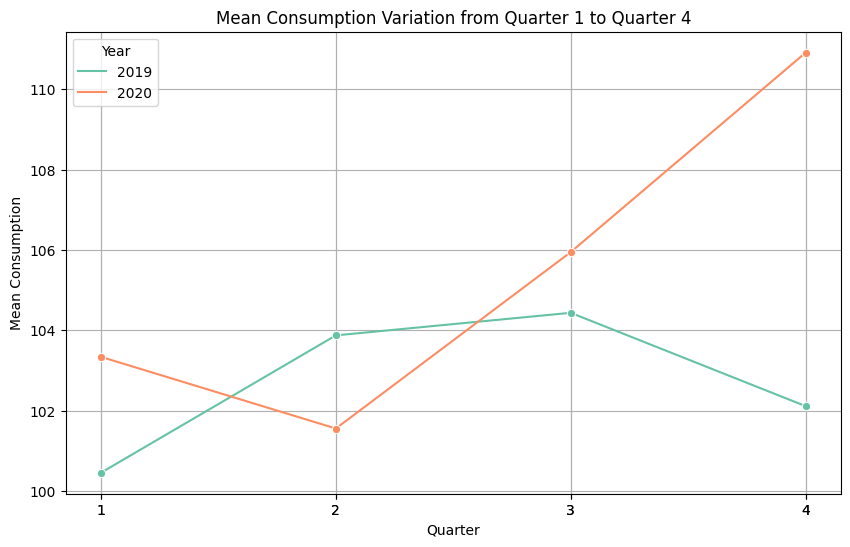

In [28]:
quarterly_mean_usage = df1.groupby(['Quarter', 'Year'])['Usage'].mean().reset_index()

# Plot the mean consumption for each quarter
plt.figure(figsize=(10, 6))
sns.lineplot(data=quarterly_mean_usage, x='Quarter', y='Usage', hue='Year',palette='Set2',marker='o')
plt.title('Mean Consumption Variation from Quarter 1 to Quarter 4')
plt.xlabel('Quarter')
plt.ylabel('Mean Consumption')
plt.xticks(quarterly_mean_usage['Quarter'])
plt.grid(True)
plt.show()


*In 2019, Highest consumption was made in quarter 3 whereas in 2020, Highest consumption occured in quarter 4*

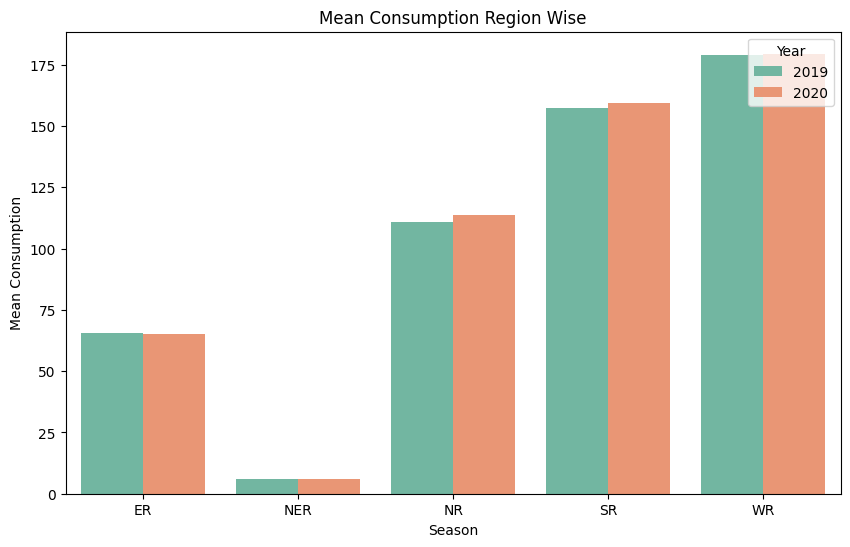

In [29]:
# Combine the region columns into a single 'Region' column
df1['Region'] = df1[['Regions_ER', 'Regions_NER', 'Regions_NR', 'Regions_SR', 'Regions_WR']].idxmax(axis=1).str.replace('Regions_', '')

# Create a bar plot of usage by region
regional_mean_usage = df1.groupby(['Region', 'Year'])['Usage'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=regional_mean_usage, x='Region', y='Usage', hue='Year',palette='Set2')
plt.title('Mean Consumption Region Wise')
plt.xlabel('Season')
plt.ylabel('Mean Consumption')
plt.legend(title='Year', loc='upper right')
plt.show()


*WR Region is the highest consumer of electricity*

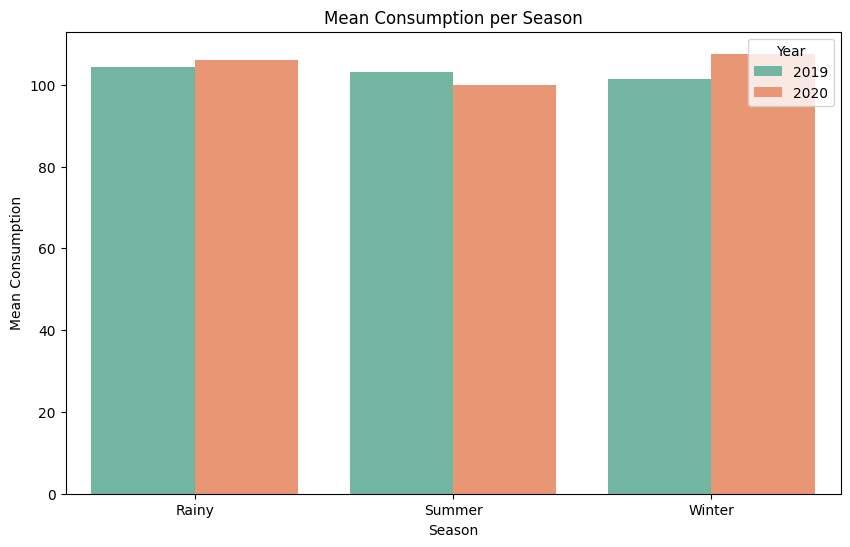

In [30]:
seasonal_mean_usage = df1.groupby(['Season', 'Year'])['Usage'].mean().reset_index()

# Plot the mean consumption per season year-wise
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_mean_usage, x='Season', y='Usage', hue='Year',palette='Set2')
plt.title('Mean Consumption per Season')
plt.xlabel('Season')
plt.ylabel('Mean Consumption')
plt.legend(title='Year', loc='upper right')
plt.show()

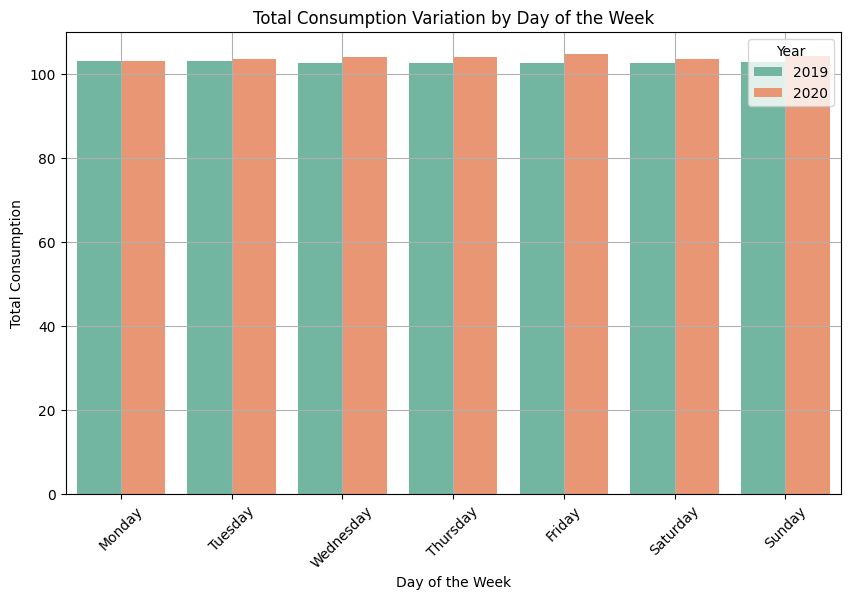

In [31]:
mean_consumption_by_day = df1.groupby(['Year','Day of the Week'])['Usage'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=mean_consumption_by_day, x='Day of the Week', y='Usage', hue='Year',palette='Set2',order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Total Consumption Variation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*Days of the Week does not make much difference in consumption*

### Model Building and Evaluation

#### PROPHET MODEL

In [32]:
df1.head()

States   latitude  longitude      Dates  Usage  Year  Month  Quarter   
0     Punjab  31.519974  75.980003 2019-01-02  119.9  2019      1        1  \
1    Haryana  28.450006  77.019991 2019-01-02  130.3  2019      1        1   
2  Rajasthan  26.449999  74.639981 2019-01-02  234.1  2019      1        1   
3      Delhi  28.669993  77.230004 2019-01-02   85.8  2019      1        1   
4         UP  27.599981  78.050006 2019-01-02  313.9  2019      1        1   

  Day of the Week  Season  Regions_ER  Regions_NER  Regions_NR  Regions_SR   
0       Wednesday  Winter       False        False        True       False  \
1       Wednesday  Winter       False        False        True       False   
2       Wednesday  Winter       False        False        True       False   
3       Wednesday  Winter       False        False        True       False   
4       Wednesday  Winter       False        False        True       False   

   Regions_WR Region  
0       False     NR  
1       False     NR  
2       False     NR  
3       False     NR  
4       False     NR

In [34]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pip\_internal\cli\req_command.py", line 245, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pip\_internal\commands\install.py", line 324, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pip\_internal\cli\req_command.py", line 95, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pi

In [35]:
from prophet import Prophet

In [36]:
state_forecasts = {}

# Iterate over unique states
for state in df1['States'].unique():
    # Filter the DataFrame for the current state
    state_df = df1[df1['States'] == state]

    # Rename columns as required by Prophet ('ds' for dates, 'y' for target variable)
    state_df_prophet = state_df.rename(columns={'Dates': 'ds', 'Usage': 'y'})

    # Instantiate Prophet model
    model = Prophet()

    # Fit the model
    model.fit(state_df_prophet)

    # Define future dates for prediction
    future_dates = model.make_future_dataframe(periods=365)  # 1 year into the future

    # Make predictions
    forecast = model.predict(future_dates)

    # Store the model and forecast in the dictionary
    state_forecasts[state] = {'model': model, 'forecast': forecast}

21:48:38 - cmdstanpy - INFO - Chain [1] start processing
21:48:38 - cmdstanpy - INFO - Chain [1] done processing
21:48:38 - cmdstanpy - INFO - Chain [1] start processing
21:48:38 - cmdstanpy - INFO - Chain [1] done processing
21:48:39 - cmdstanpy - INFO - Chain [1] start processing
21:48:39 - cmdstanpy - INFO - Chain [1] done processing
21:48:39 - cmdstanpy - INFO - Chain [1] start processing
21:48:39 - cmdstanpy - INFO - Chain [1] done processing
21:48:39 - cmdstanpy - INFO - Chain [1] start processing
21:48:40 - cmdstanpy - INFO - Chain [1] done processing
21:48:40 - cmdstanpy - INFO - Chain [1] start processing
21:48:40 - cmdstanpy - INFO - Chain [1] done processing
21:48:40 - cmdstanpy - INFO - Chain [1] start processing
21:48:40 - cmdstanpy - INFO - Chain [1] done processing
21:48:41 - cmdstanpy - INFO - Chain [1] start processing
21:48:41 - cmdstanpy - INFO - Chain [1] done processing
21:48:41 - cmdstanpy - INFO - Chain [1] start processing
21:48:41 - cmdstanpy - INFO - Chain [1]

In [37]:
delhi_forecast=state_forecasts['Delhi']['forecast']

Evaluate the model

In [38]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize lists to store evaluation metrics and states
mae_list = []
rmse_list = []
state_list = []

# Iterate over the state forecasts dictionary
for state, forecast_data in state_forecasts.items():
    # Get the forecast DataFrame
    forecast = forecast_data['forecast']

    # Filter the actual data for the current state
    actual_data = df1[df1['States'] == state].set_index('Dates')['Usage']

    # Filter the forecasted data for the evaluation period
    forecast = forecast.set_index('ds').loc[actual_data.index]

    # Calculate MAE and RMSE
    mae = mean_absolute_error(actual_data, forecast['yhat'])
    rmse = np.sqrt(mean_squared_error(actual_data, forecast['yhat']))

    # Append the metrics and state to the lists
    mae_list.append(mae)
    rmse_list.append(rmse)
    state_list.append(state)

# Create a DataFrame from the lists
evaluation_df = pd.DataFrame({'State': state_list,'MAE': mae_list, 'RMSE': rmse_list})

# Display the DataFrame
evaluation_df


State        MAE       RMSE
0              Punjab  45.408522  56.678143
1             Haryana  30.804064  37.953439
2           Rajasthan  20.818914  27.286212
3               Delhi  22.249545  25.832638
4                  UP  56.948296  66.347835
5         Uttarakhand   4.945077   6.686758
6                  HP   3.379470   4.784831
7                 J&K   3.640942   4.756564
8          Chandigarh   0.947867   1.138589
9        Chhattisgarh   8.375718  10.065108
10            Gujarat  28.526613  38.053045
11                 MP  26.010924  30.984385
12        Maharashtra  34.564551  41.694005
13                Goa   1.188813   1.514958
14                DNH   2.988604   4.565235
15     Andhra Pradesh  13.637996  15.657345
16          Telangana  25.146115  29.583345
17          Karnataka  25.138027  29.964428
18             Kerala   5.465327   6.799283
19         Tamil Nadu  28.833252  34.895673
20              Pondy   0.851495   1.118244
21              Bihar  12.590836  14.888825
22          Jharkhand   1.464041   1.941232
23             Odisha   8.934846  10.843956
24        West Bengal  24.277802  27.810231
25             Sikkim   0.273499   0.362784
26  Arunachal Pradesh   0.154885   0.226593
27              Assam   3.758947   4.714242
28            Manipur   0.165599   0.222305
29          Meghalaya   0.532779   0.711274
30            Mizoram   0.109253   0.142537
31           Nagaland   0.107726   0.142956
32            Tripura   0.614718   0.743859

Usage Forecast

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


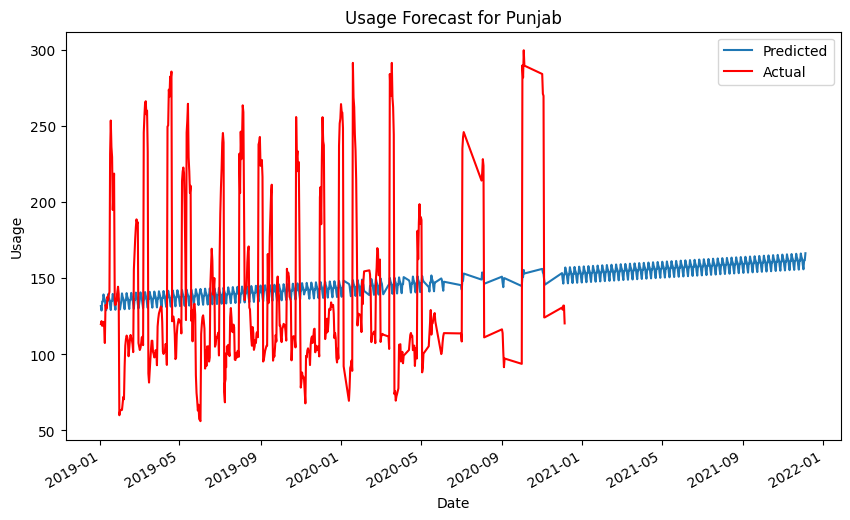

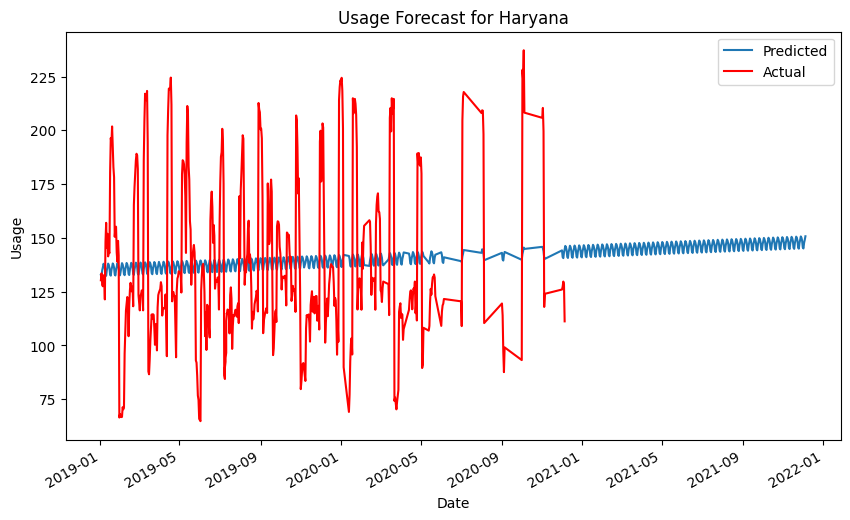

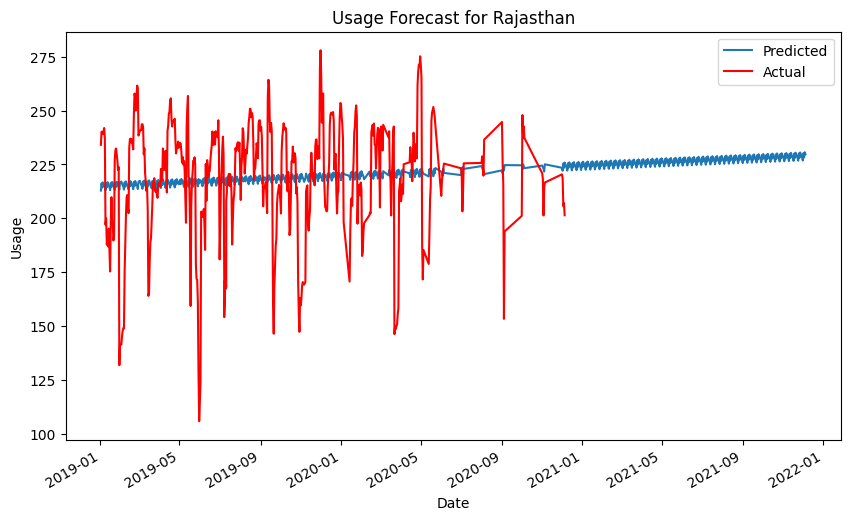

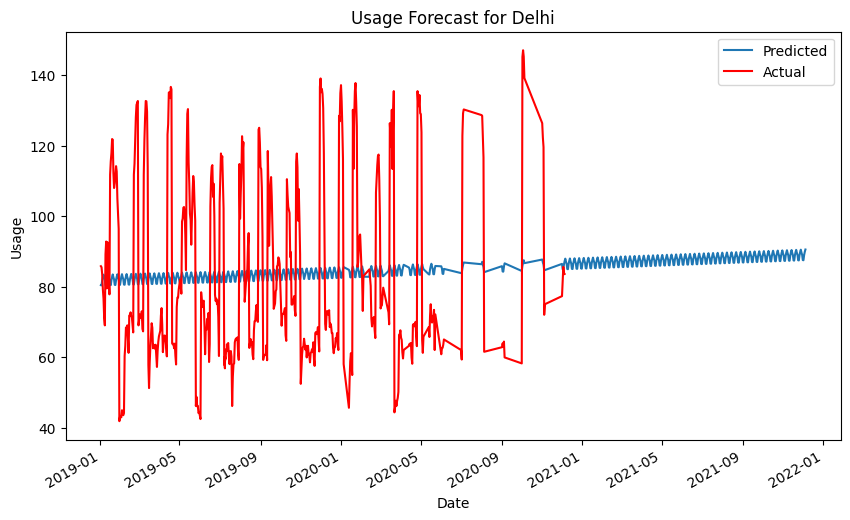

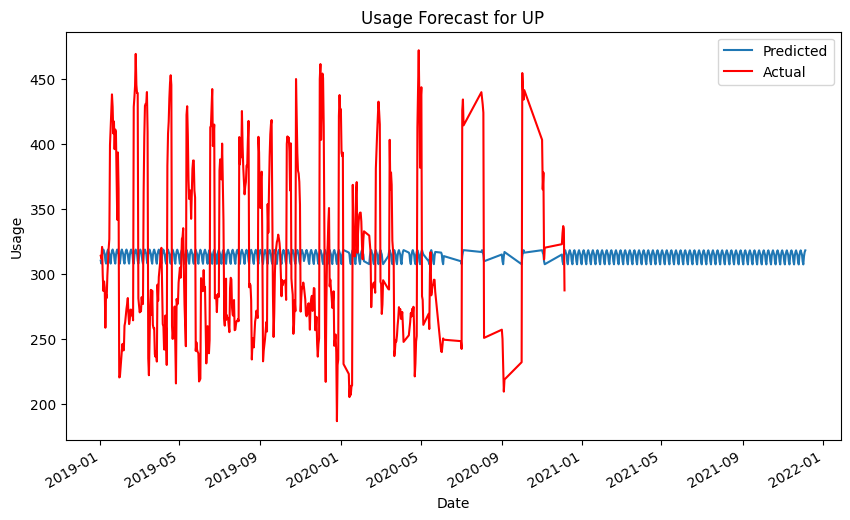

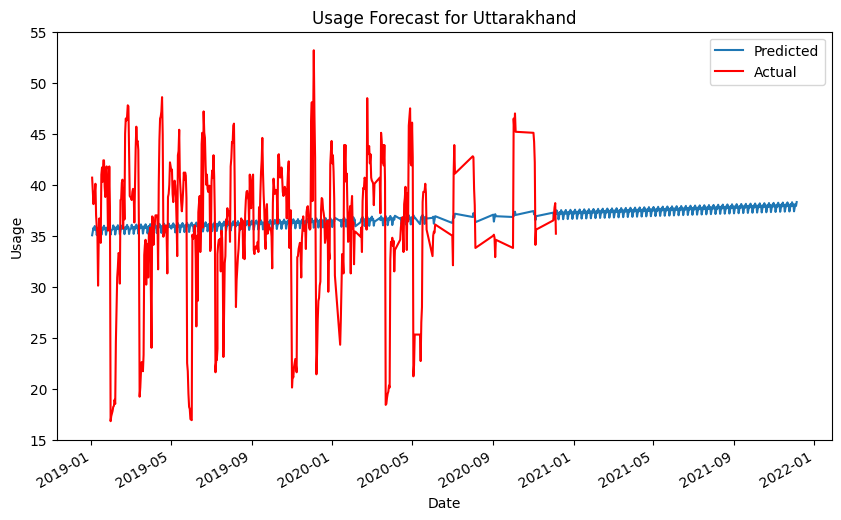

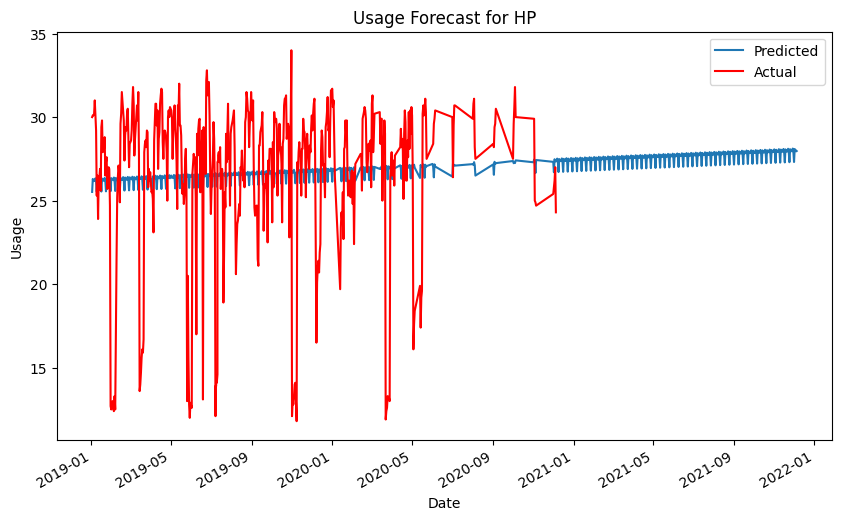

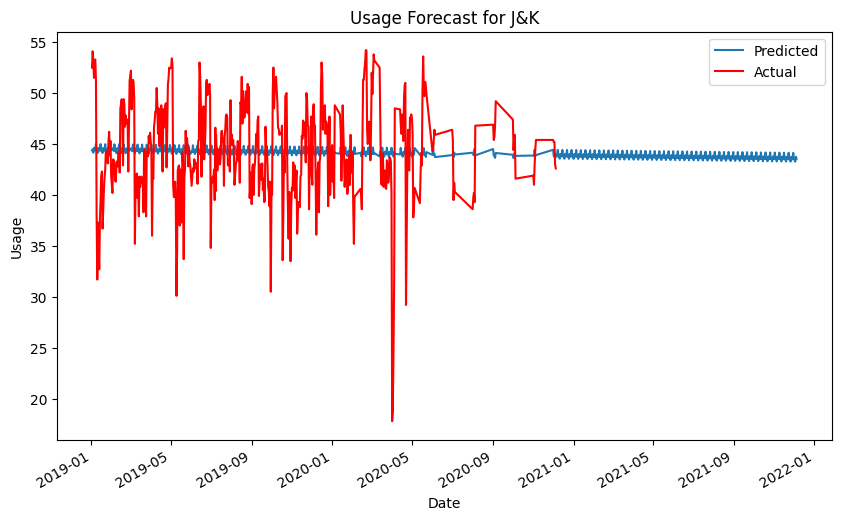

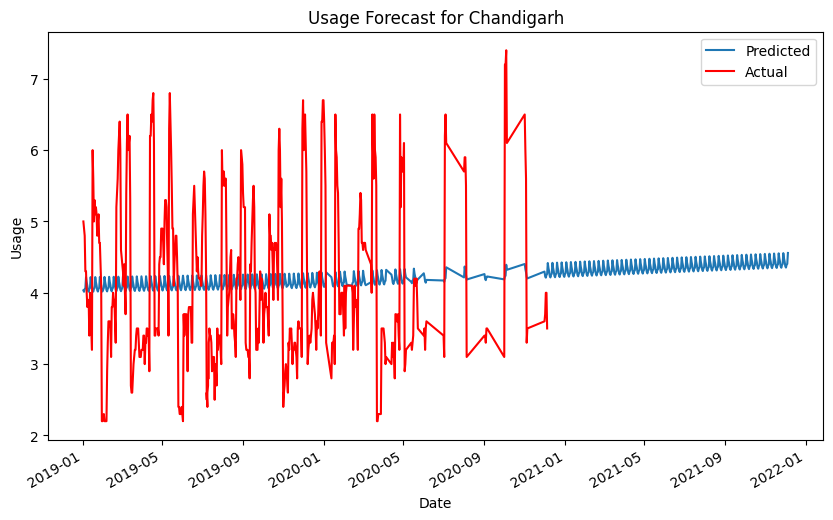

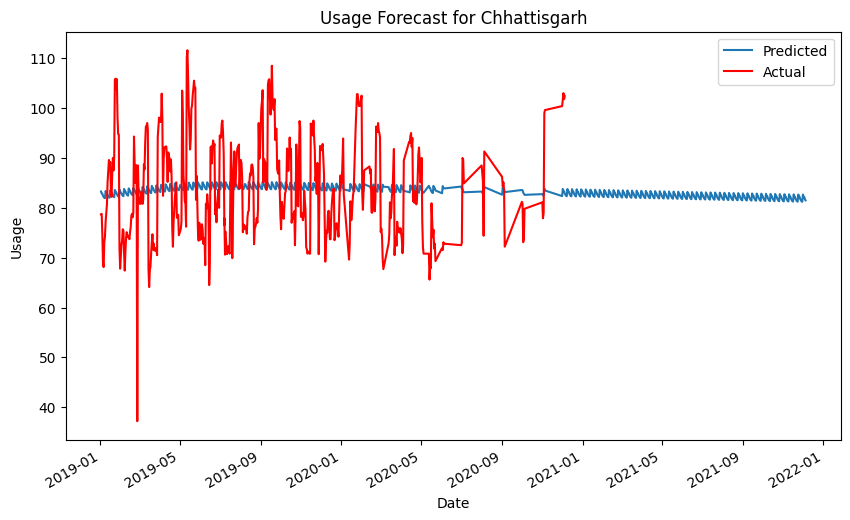

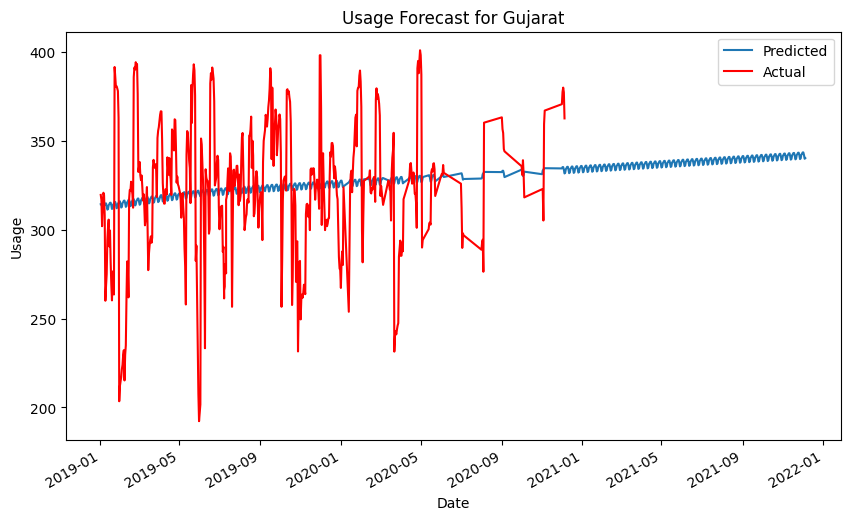

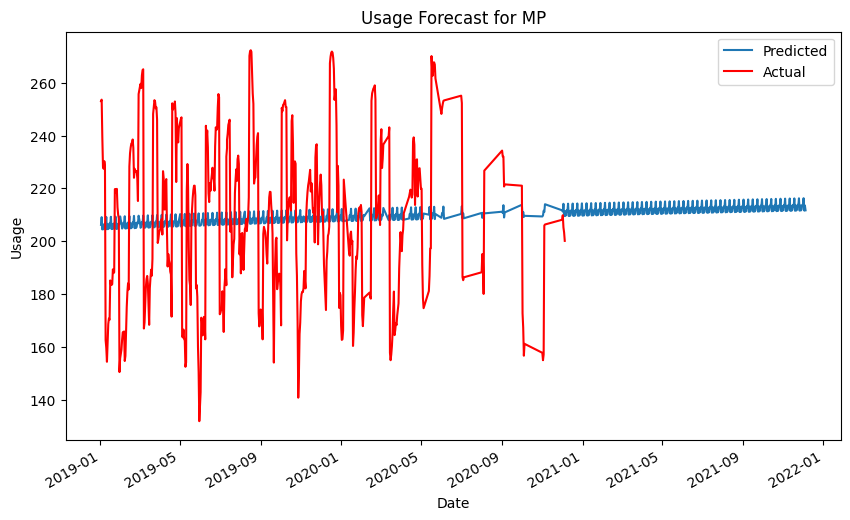

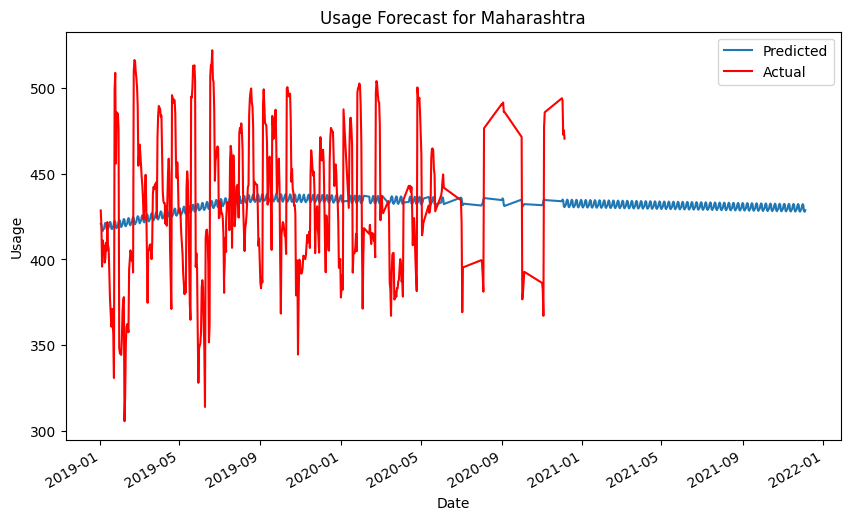

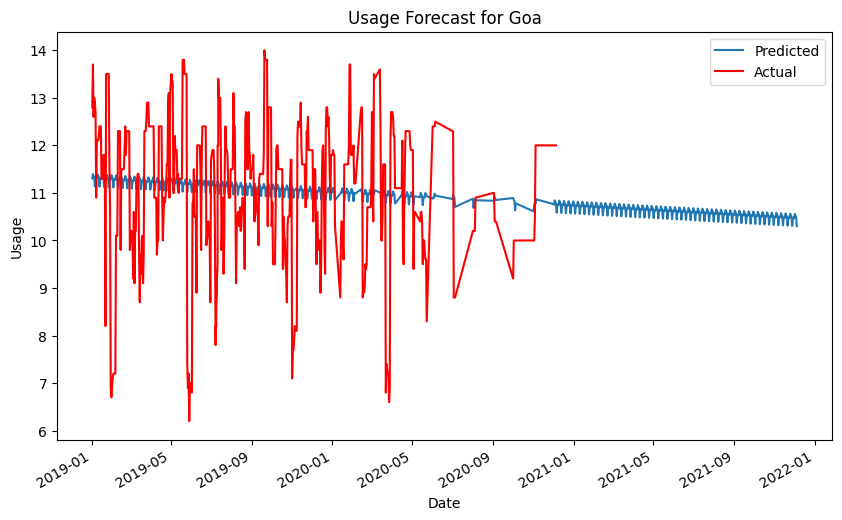

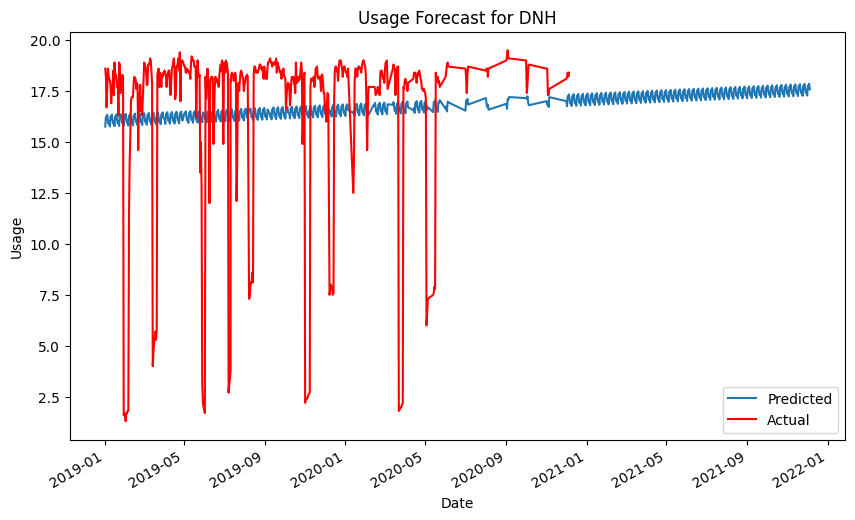

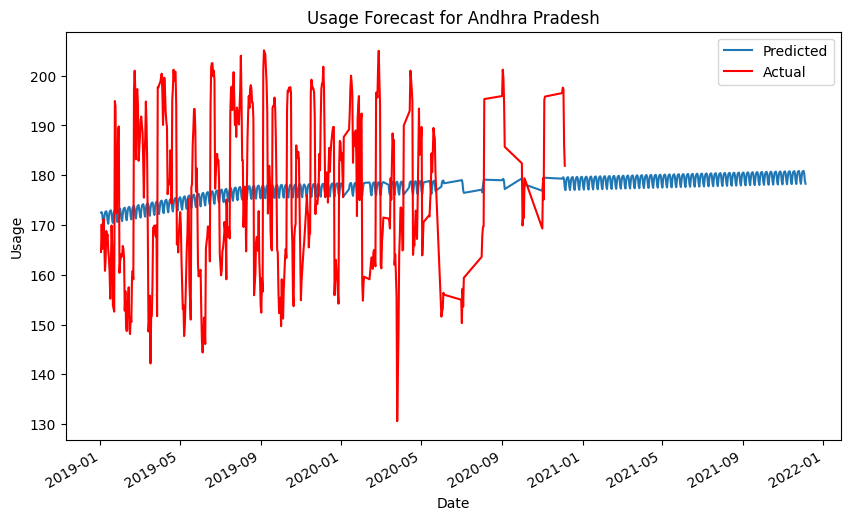

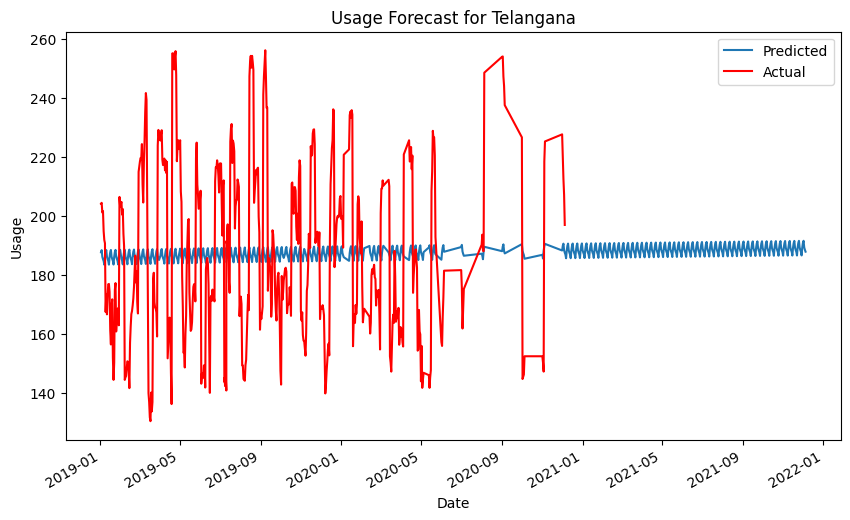

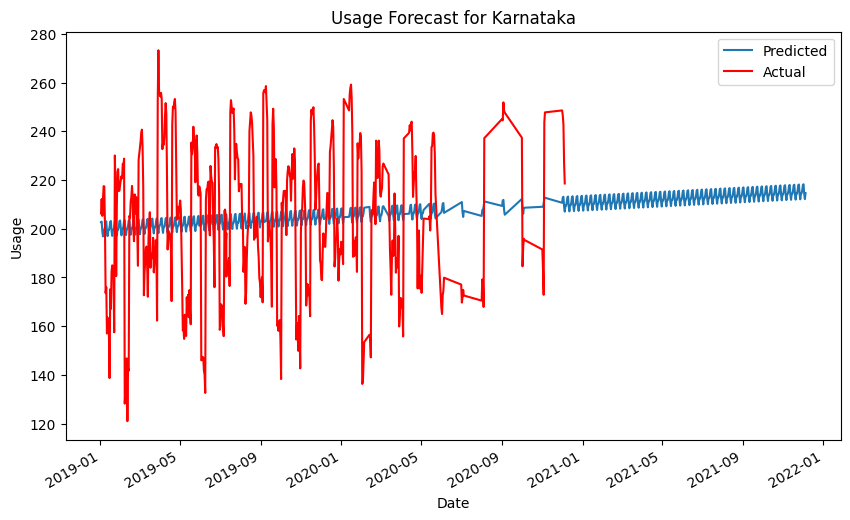

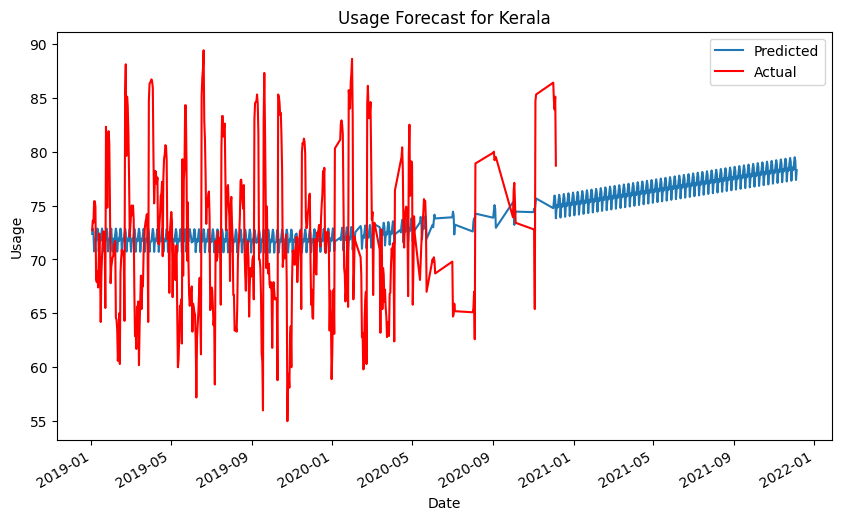

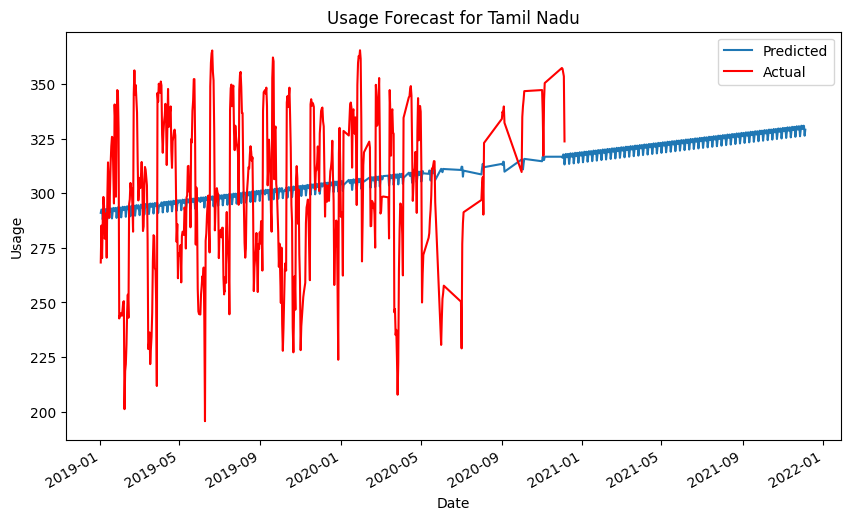

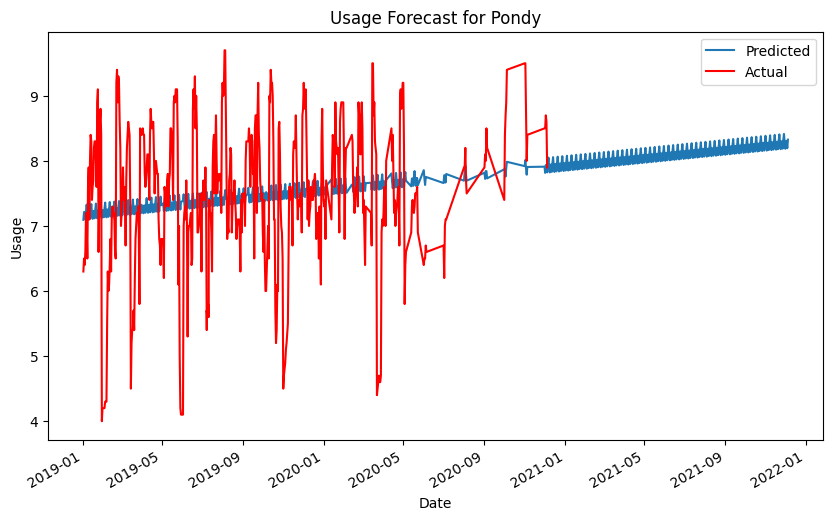

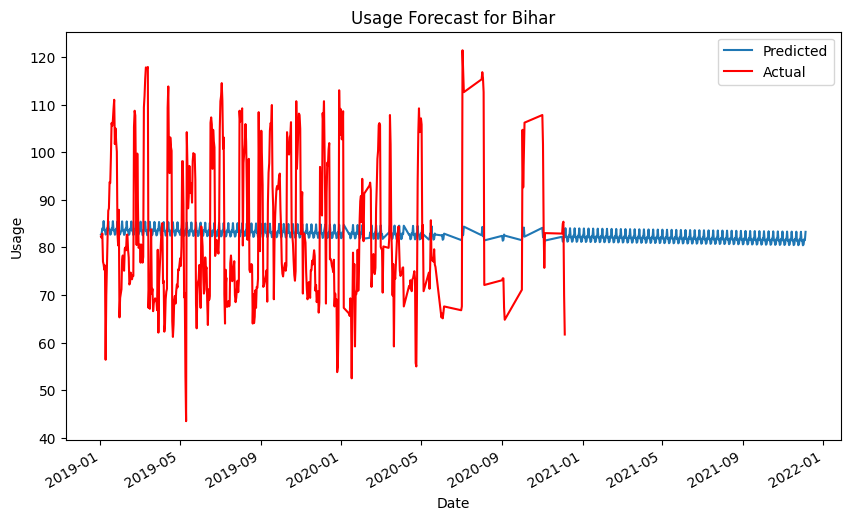

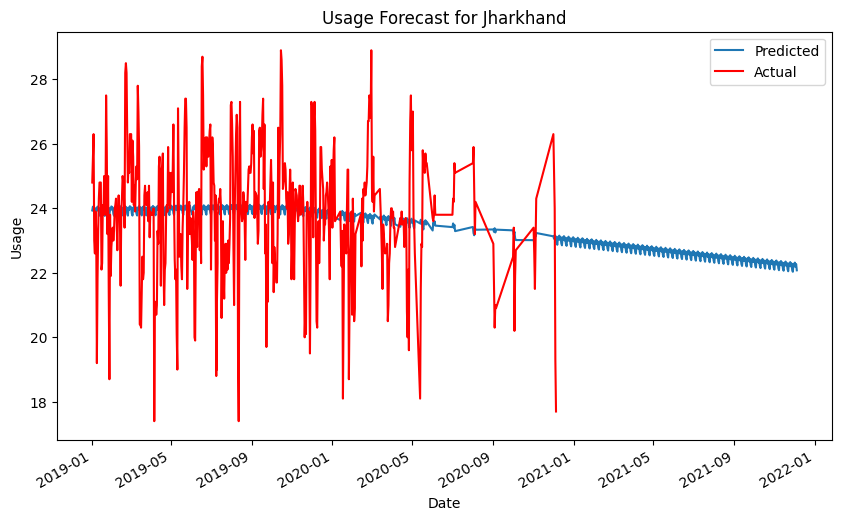

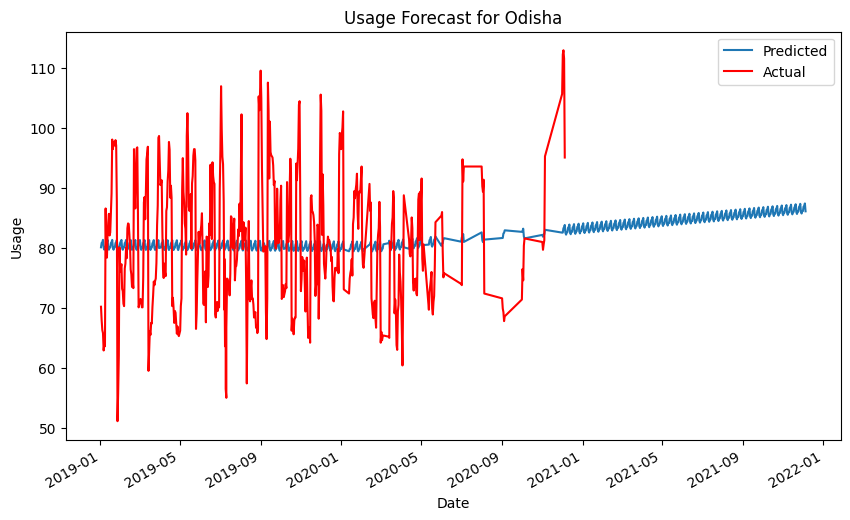

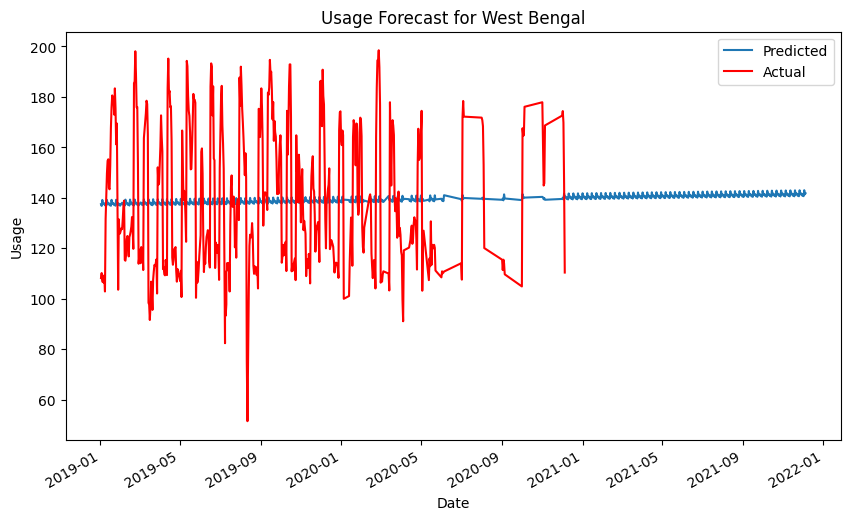

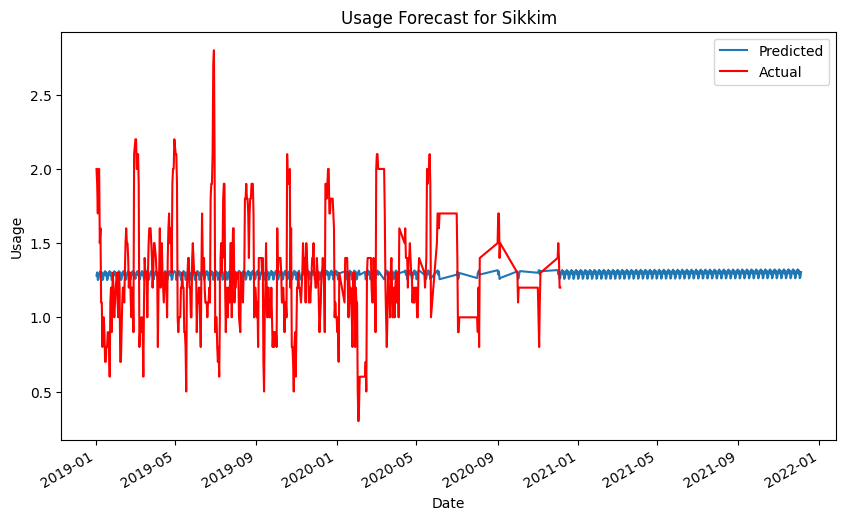

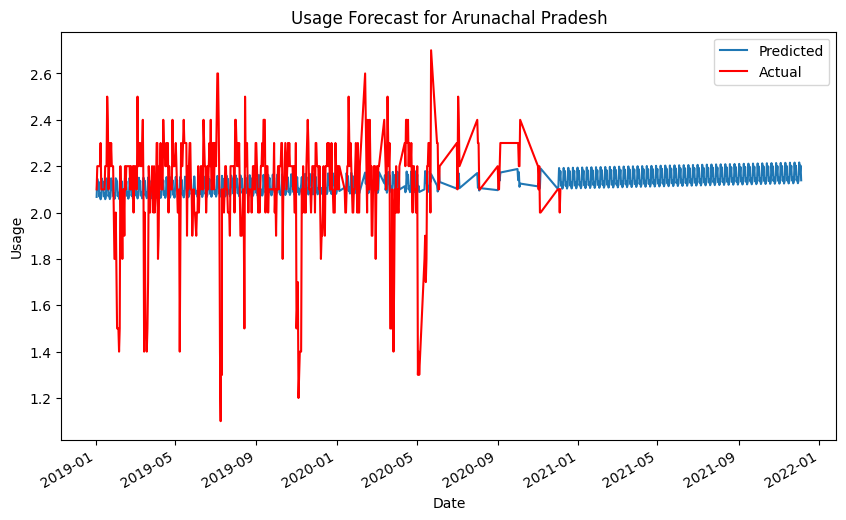

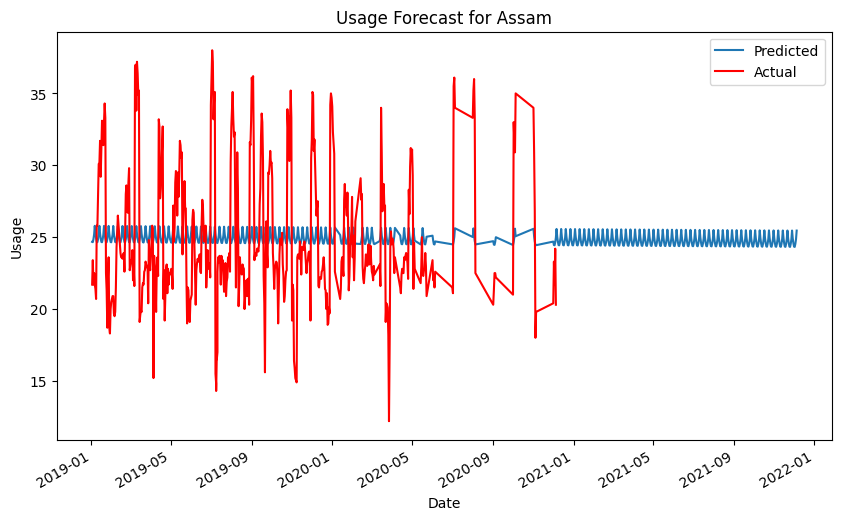

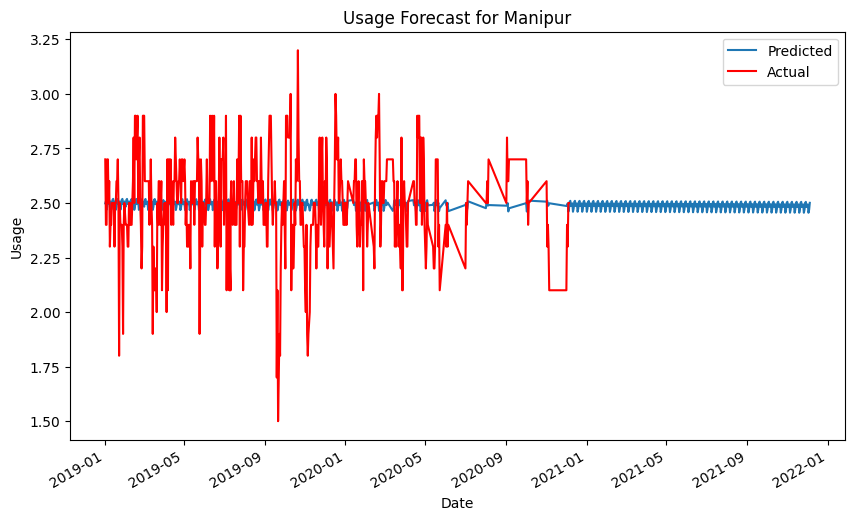

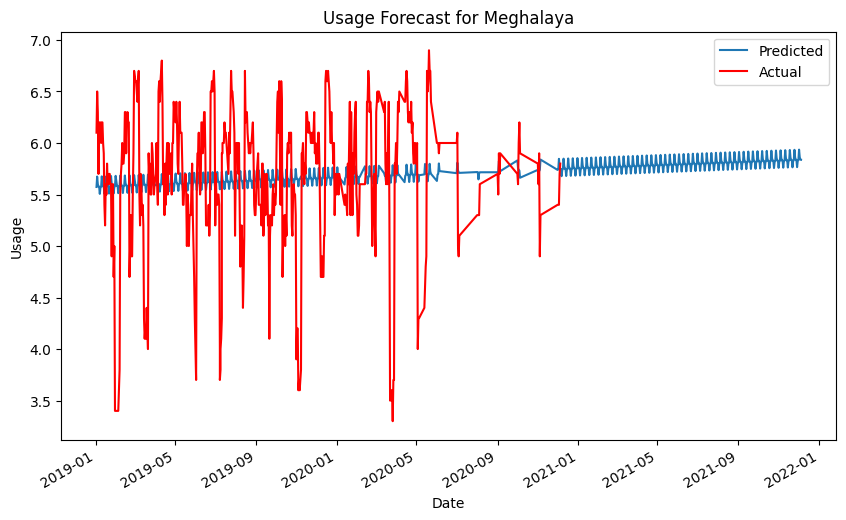

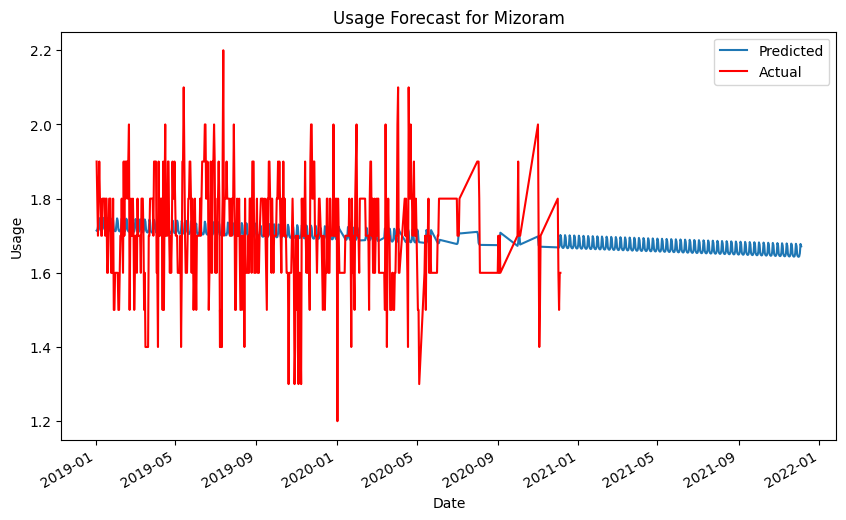

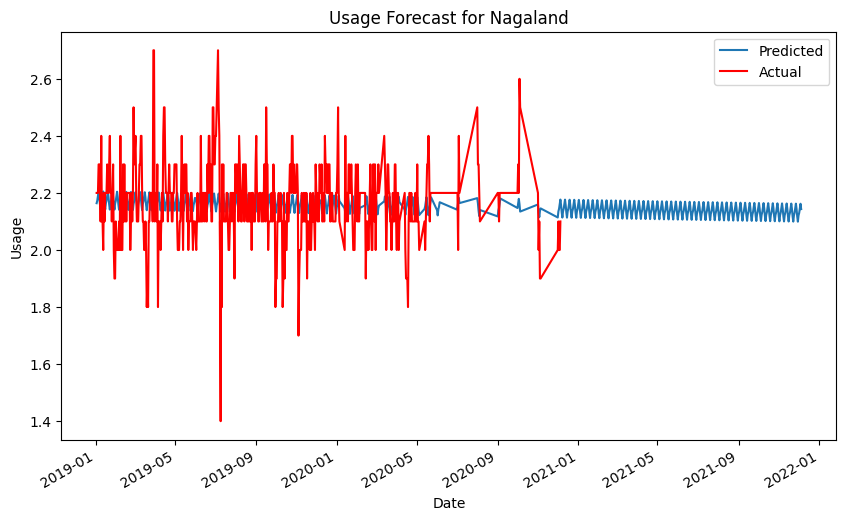

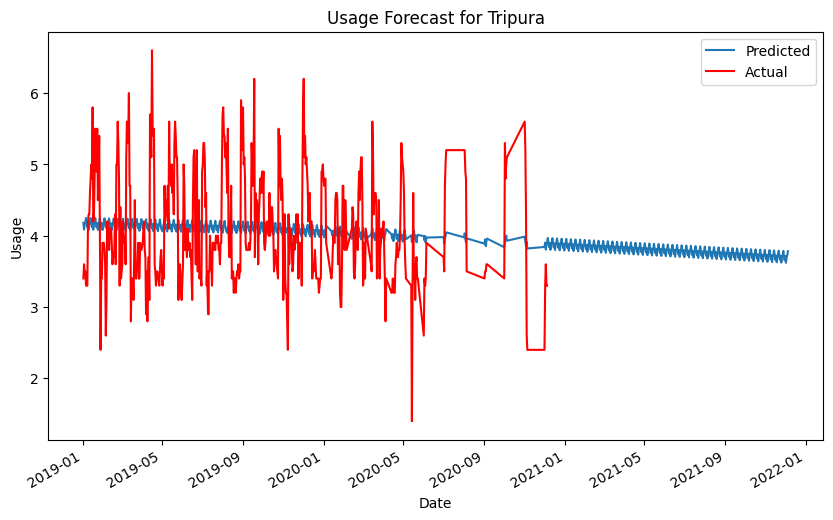

In [39]:
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store the plots for each state
state_plots = {}

# Iterate over the state forecasts dictionary
for state, forecast_data in state_forecasts.items():
    # Get the forecast DataFrame
    forecast = forecast_data['forecast']

    # Plot the forecast
    fig = forecast.plot(x='ds', y='yhat', label='Predicted', figsize=(10, 6))

    # Plot the actual data
    actual_data = df1[df1['States'] == state].set_index('Dates')
    plt.plot(actual_data.index, actual_data['Usage'], label='Actual', color='red')

    # Set plot title and labels
    plt.title(f'Usage Forecast for {state}')
    plt.xlabel('Date')
    plt.ylabel('Usage')
    plt.legend()

    # Store the plot in the dictionary
    state_plots[state] = fig

# Show the plots
plt.show()

#### LSTM Model

In [40]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Initialize an empty dictionary to store LSTM models and forecasts for each state
state_lstm_forecasts = {}

# Iterate over unique states
for state in df1['States'].unique():
    # Filter the DataFrame for the current state
    state_df = df1[df1['States'] == state]

    # Extract usage data for the current state
    usage_data = state_df['Usage'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(usage_data)

    # Define the number of time steps and features
    n_steps = 3  # Adjust as needed
    n_features = 1  # Usage data

    # Prepare data into sequences
    X, y = [], []
    for i in range(len(scaled_data) - n_steps):
        X.append(scaled_data[i:i+n_steps, 0])
        y.append(scaled_data[i+n_steps, 0])
    X, y = np.array(X), np.array(y)

    # Reshape input data for LSTM (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the LSTM model
    model.fit(X, y, epochs=100, batch_size=32, verbose=0)  # Adjust epochs and batch size as needed

    # Store the model in the dictionary
    state_lstm_forecasts[state] = model

# Now state_lstm_forecasts dictionary contains trained LSTM models for each state


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.p

Evaluate the model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize lists to store evaluation metrics and states
mae_list = []
rmse_list = []
state_list = []

# Iterate over the LSTM models for each state
for state, lstm_model in state_lstm_forecasts.items():
    # Filter the DataFrame for the current state
    state_df = df1[df1['States'] == state]

    # Extract usage data for the current state
    usage_data = state_df['Usage'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(usage_data)

    # Prepare test data into sequences
    X_test, y_test = [], []
    for i in range(len(scaled_data) - n_steps):
        X_test.append(scaled_data[i:i+n_steps, 0])
        y_test.append(scaled_data[i+n_steps, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)

    # Reshape input data for LSTM (samples, time steps, features)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

    # Make predictions using the LSTM model
    predictions = lstm_model.predict(X_test)

    # Inverse transform predictions and actual values
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    # Append the metrics and state to the lists
    mae_list.append(mae)
    rmse_list.append(rmse)
    state_list.append(state)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Create a DataFrame from the lists
evaluation_df = pd.DataFrame({'State': state_list,'MAE': mae_list, 'RMSE': rmse_list})

# Display the DataFrame
evaluation_df

State        MAE       RMSE
0              Punjab  19.176397  33.565795
1             Haryana  13.570220  22.581776
2           Rajasthan  10.454069  15.346571
3               Delhi   8.959475  15.136120
4                  UP  25.567084  40.412749
5         Uttarakhand   2.595204   3.999828
6                  HP   2.184693   3.157286
7                 J&K   2.454782   3.617752
8          Chandigarh   0.410634   0.690385
9        Chhattisgarh   4.742128   6.860803
10            Gujarat  14.450110  23.136757
11                 MP  10.410037  17.141047
12        Maharashtra  16.563472  25.903782
13                Goa   0.677988   1.026304
14                DNH   1.251479   2.584437
15     Andhra Pradesh   5.969710   8.921509
16          Telangana  10.712310  16.753095
17          Karnataka  12.020866  18.528193
18             Kerala   3.046819   4.593043
19         Tamil Nadu  14.551236  20.916383
20              Pondy   0.487599   0.708037
21              Bihar   6.760770   9.955043
22          Jharkhand   1.131093   1.591142
23             Odisha   4.848764   7.064652
24        West Bengal  12.662298  17.962196
25             Sikkim   0.174984   0.241409
26  Arunachal Pradesh   0.126211   0.183557
27              Assam   2.052671   3.113215
28            Manipur   0.145139   0.192280
29          Meghalaya   0.307113   0.443681
30            Mizoram   0.102986   0.133292
31           Nagaland   0.097932   0.131024
32            Tripura   0.403202   0.560311

Usage Forecast

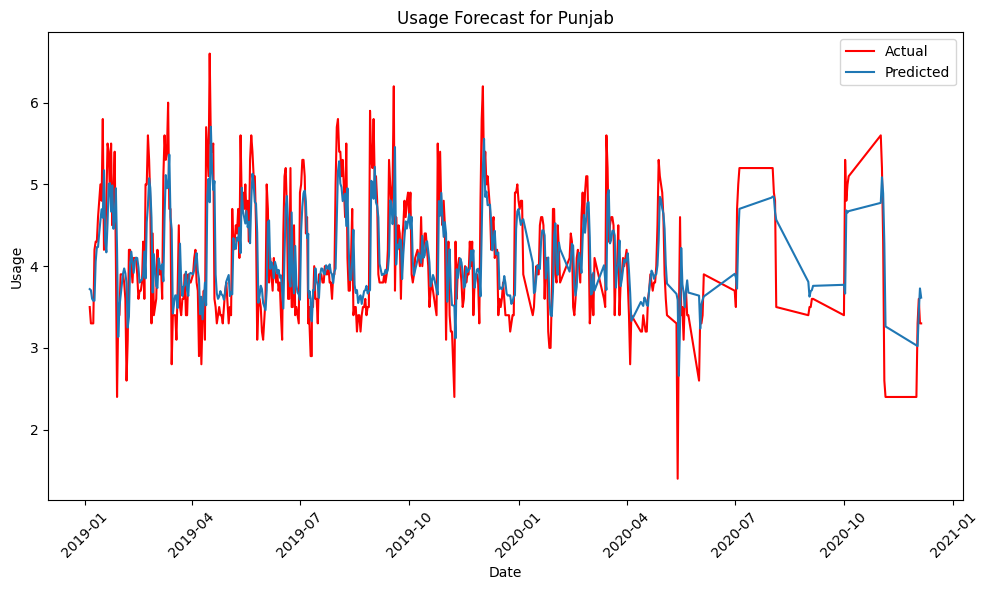

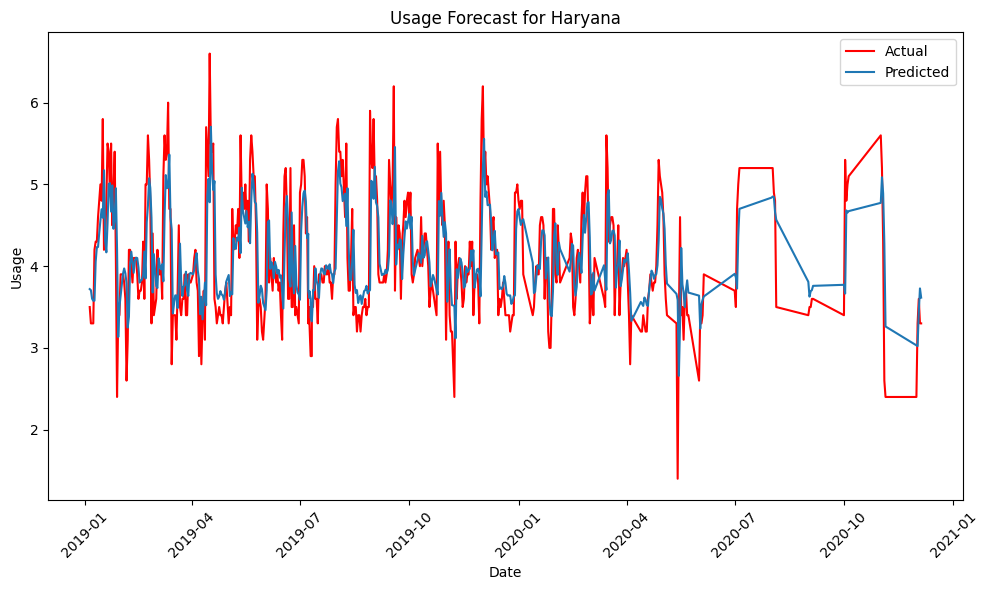

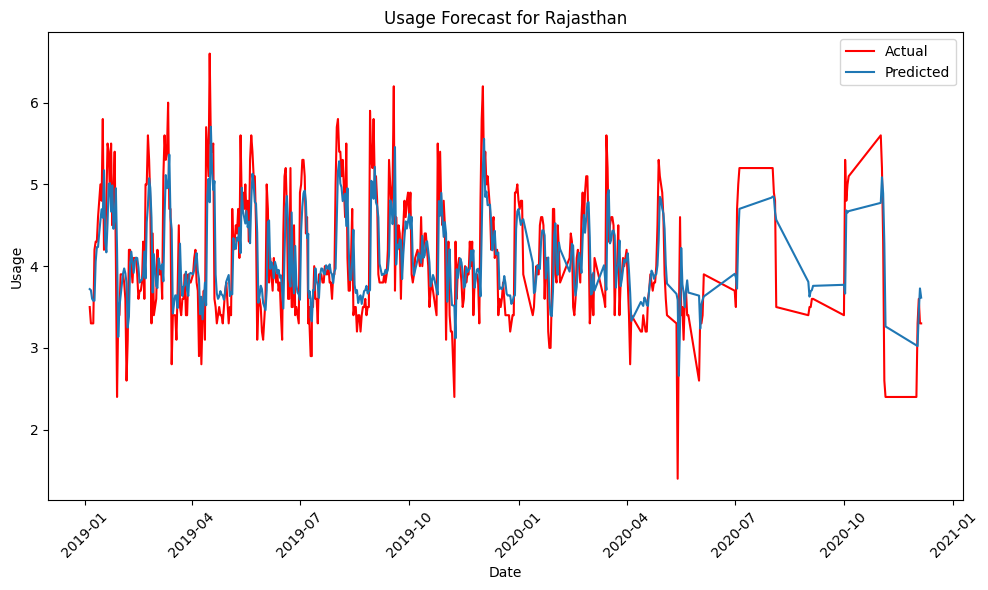

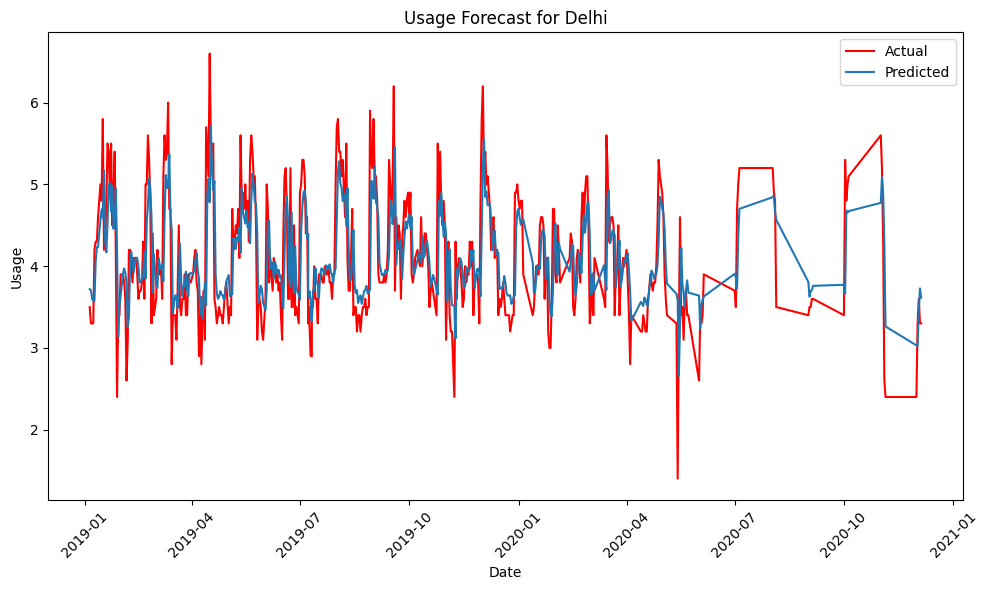

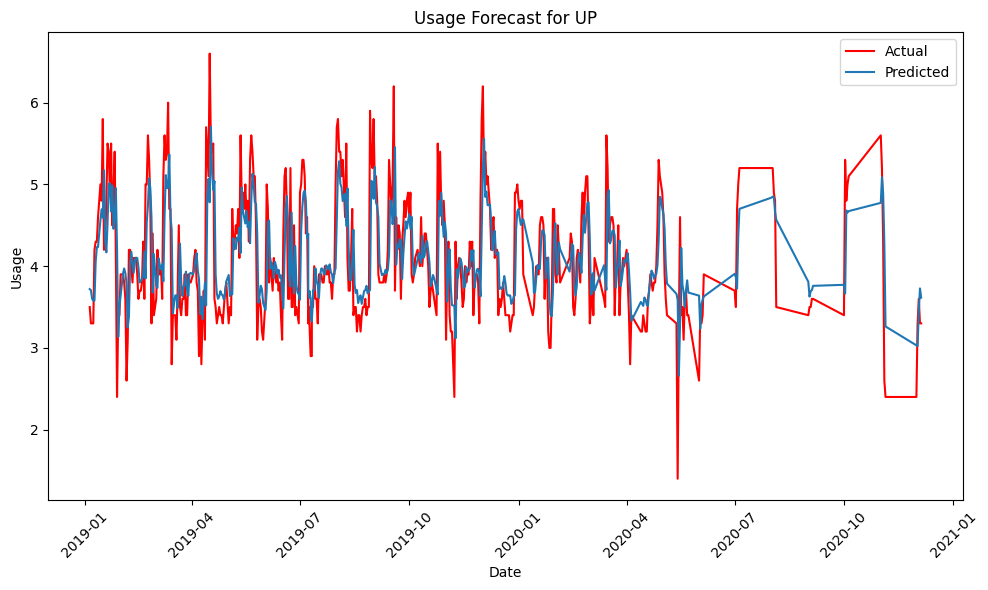

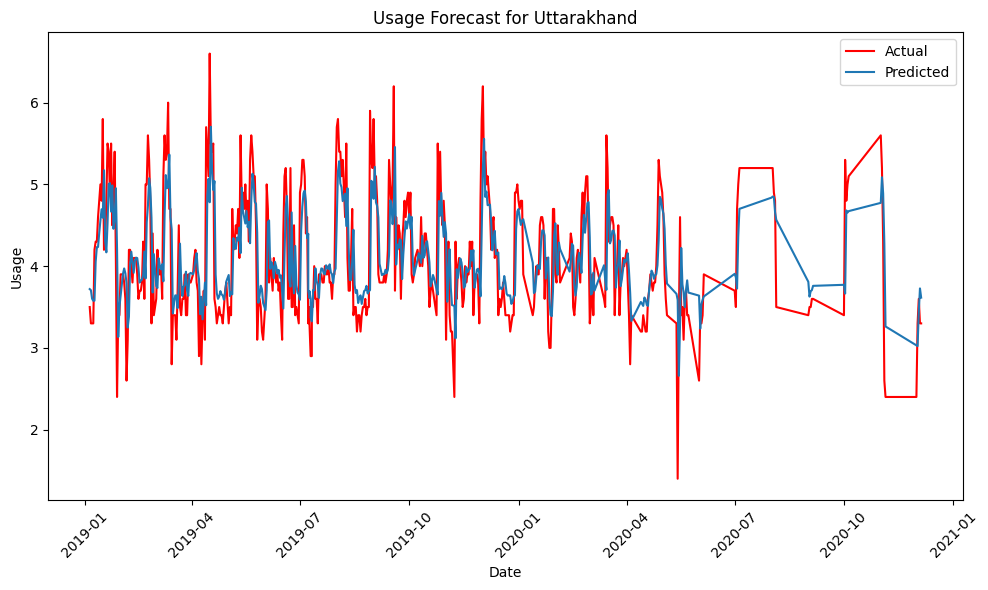

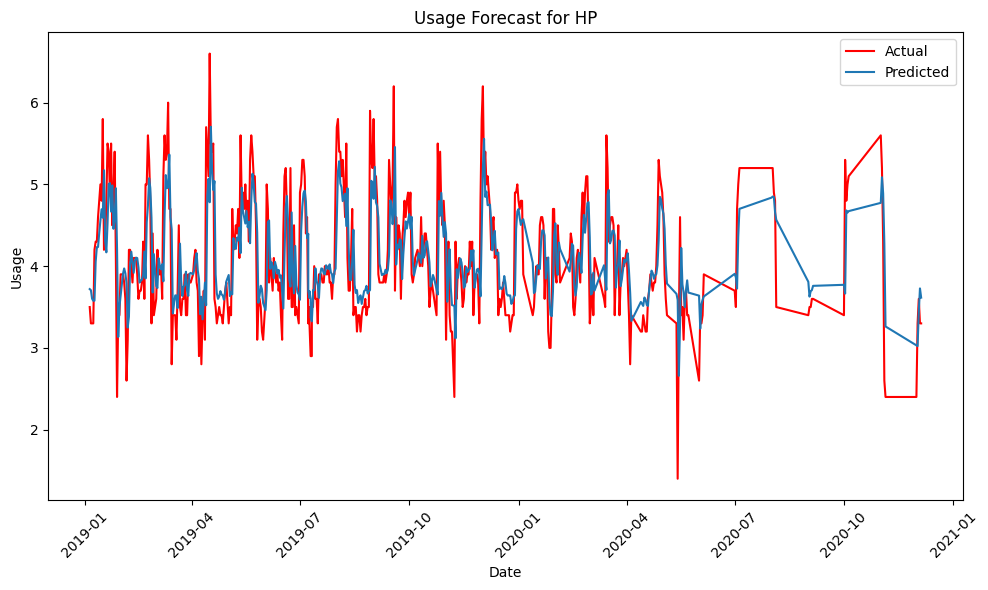

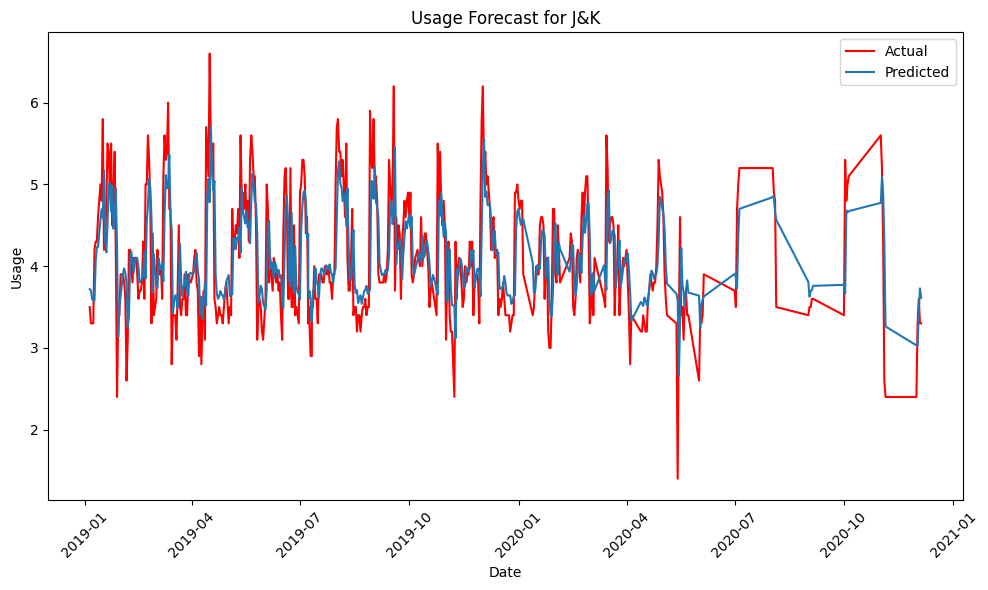

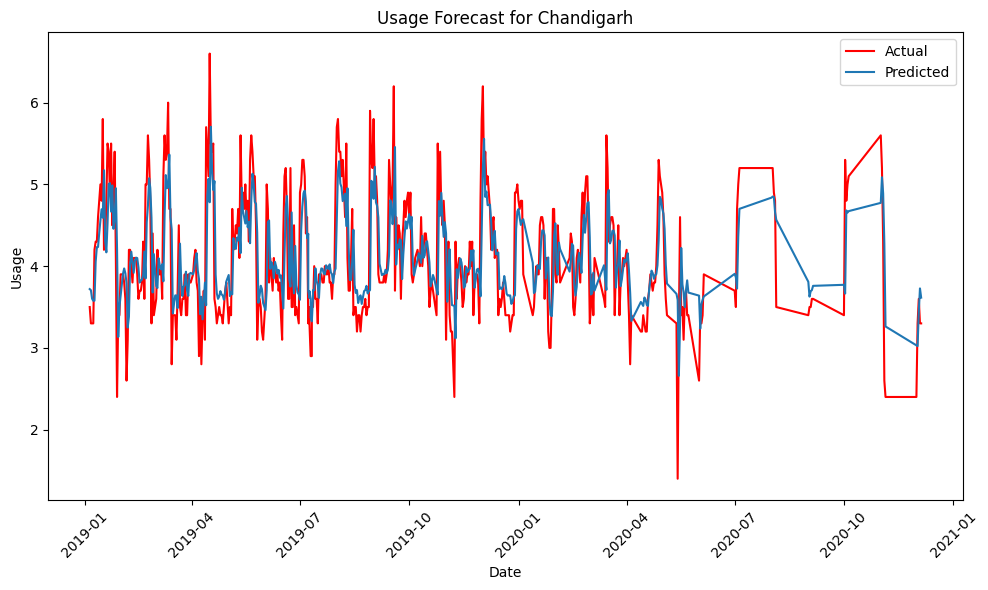

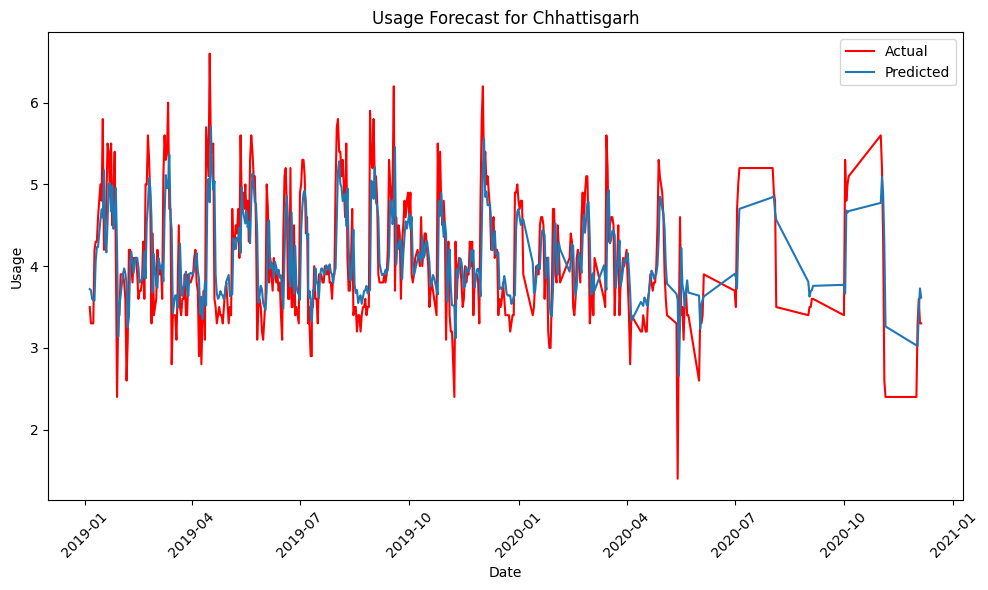

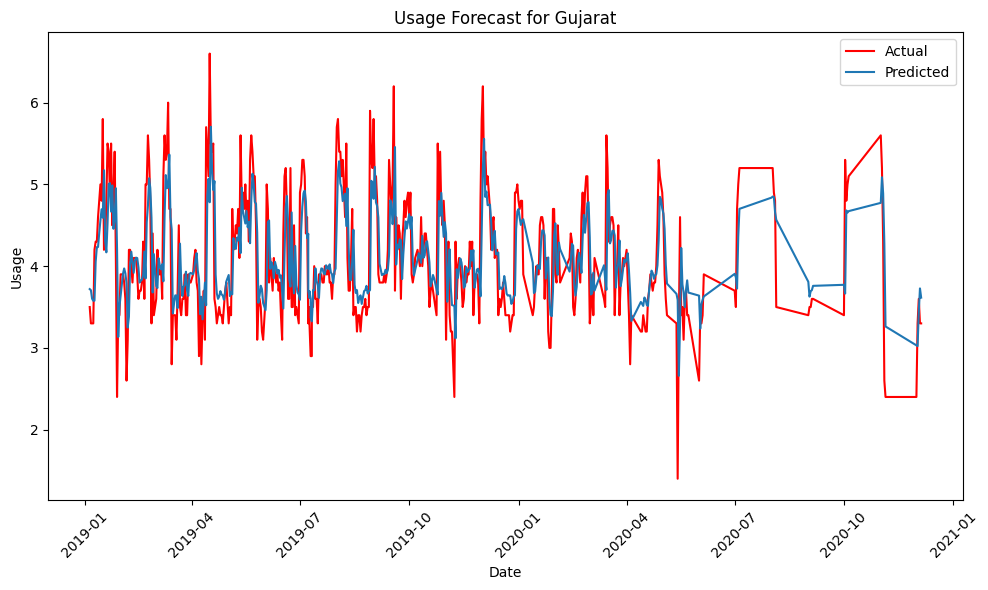

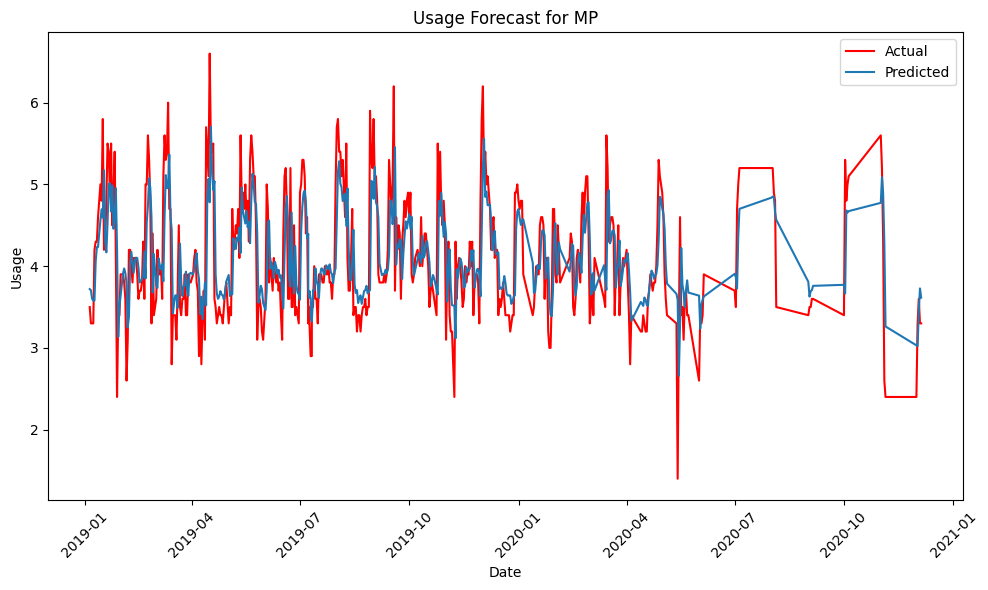

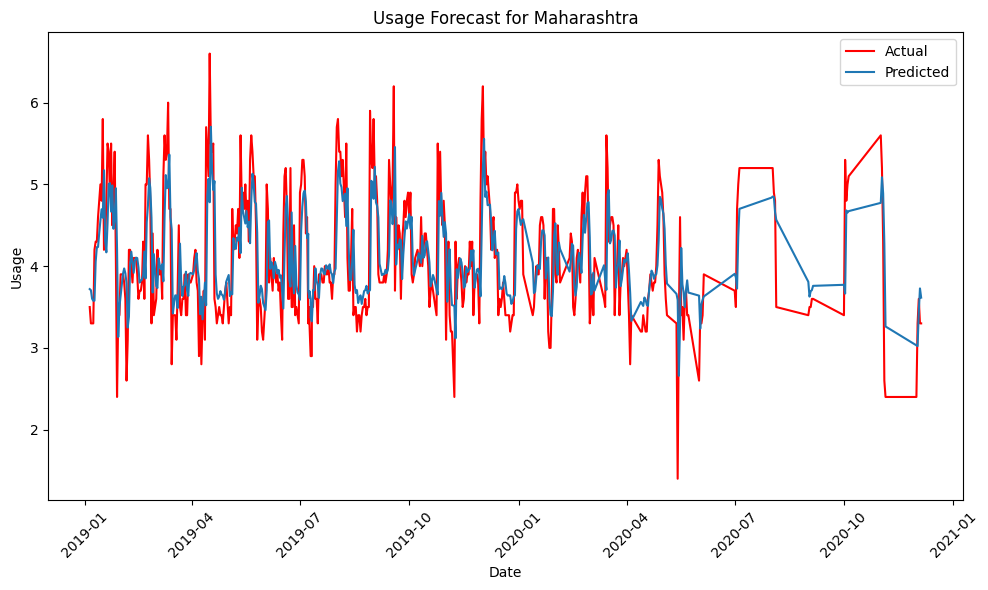

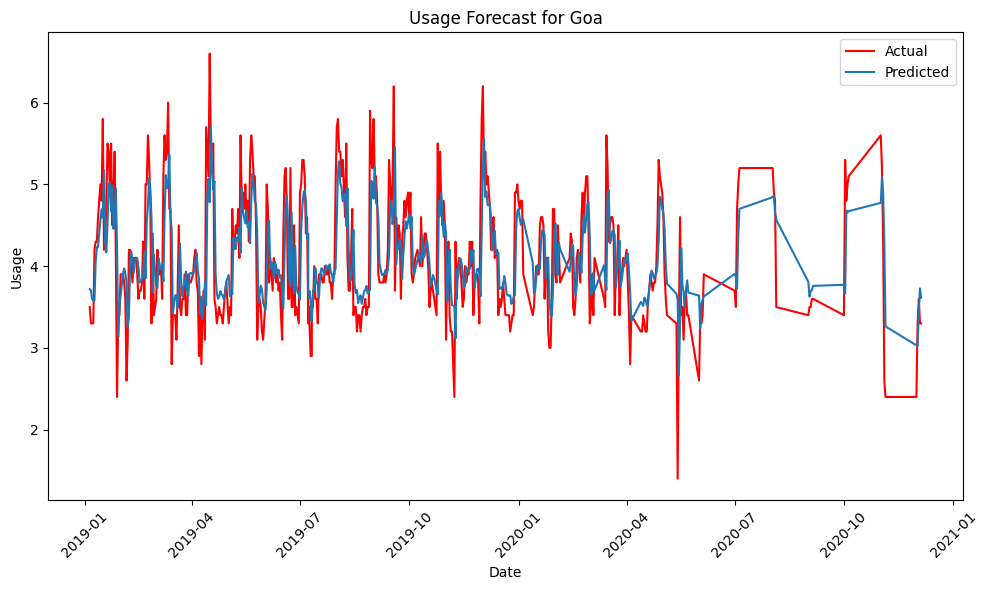

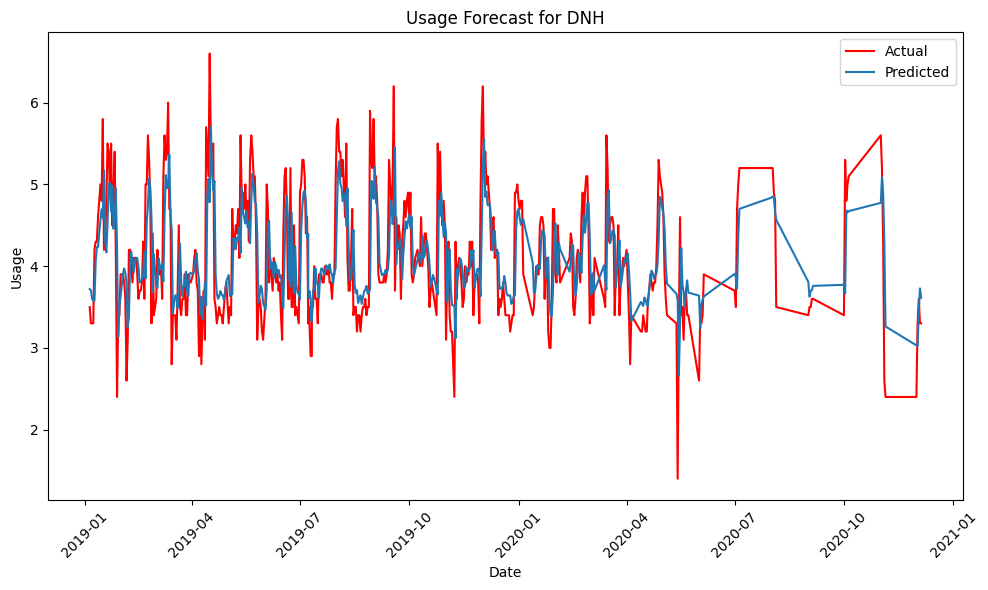

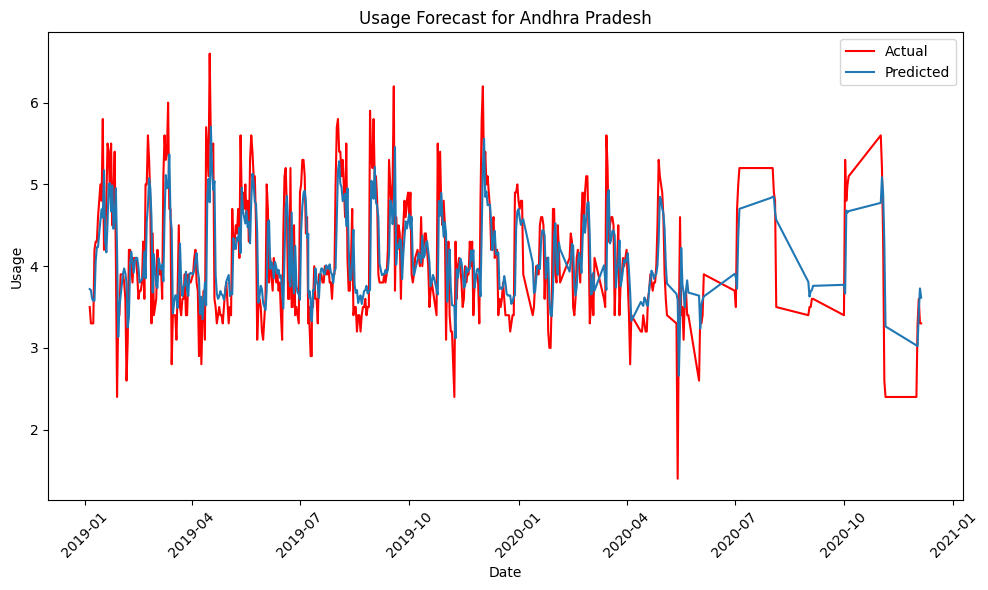

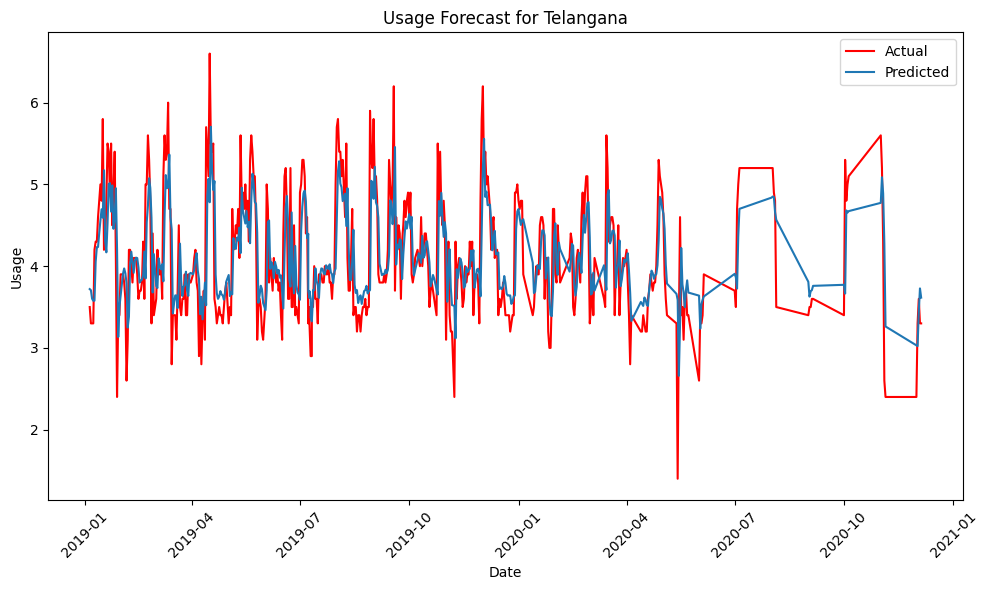

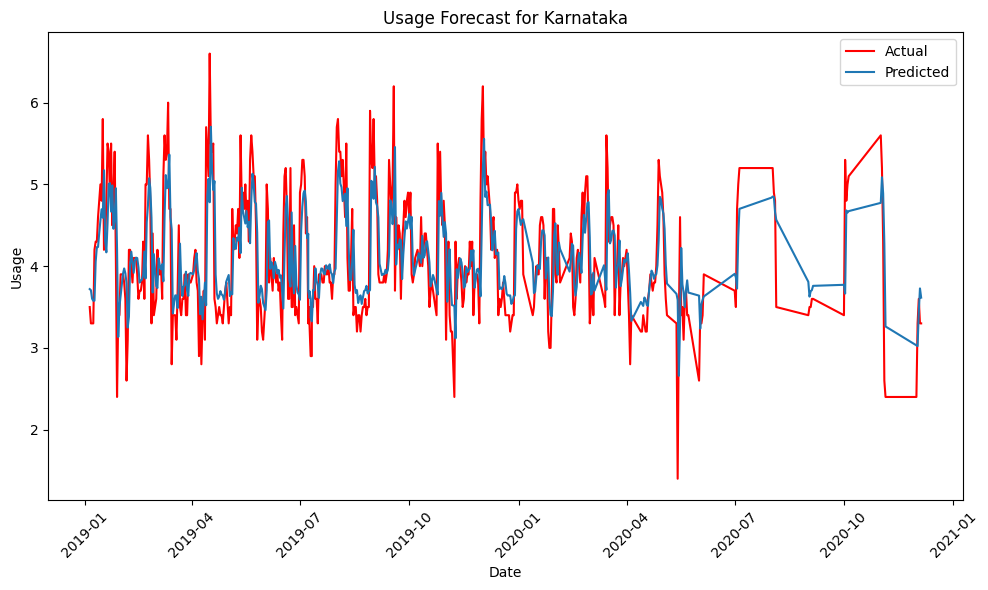

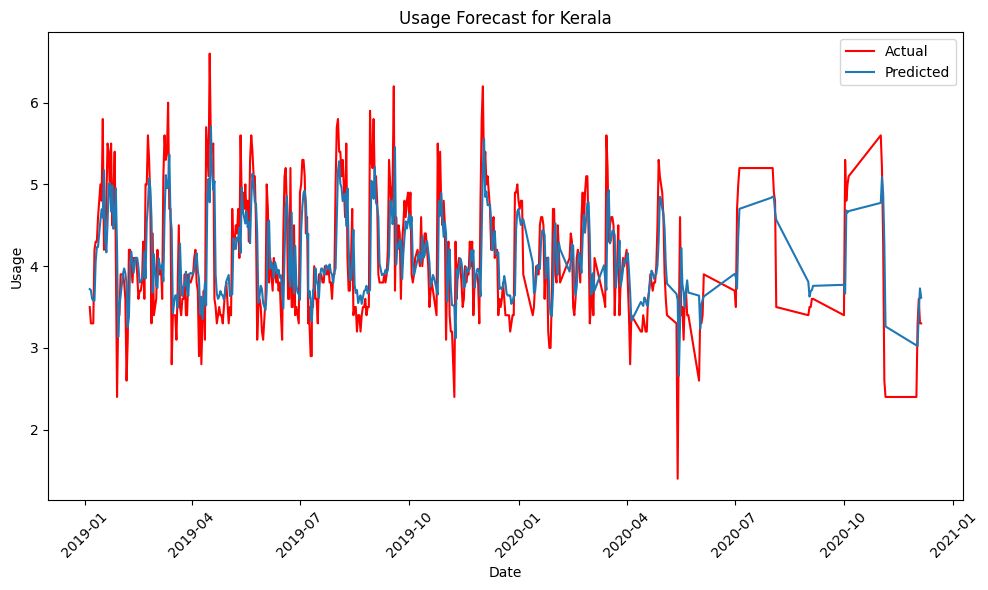

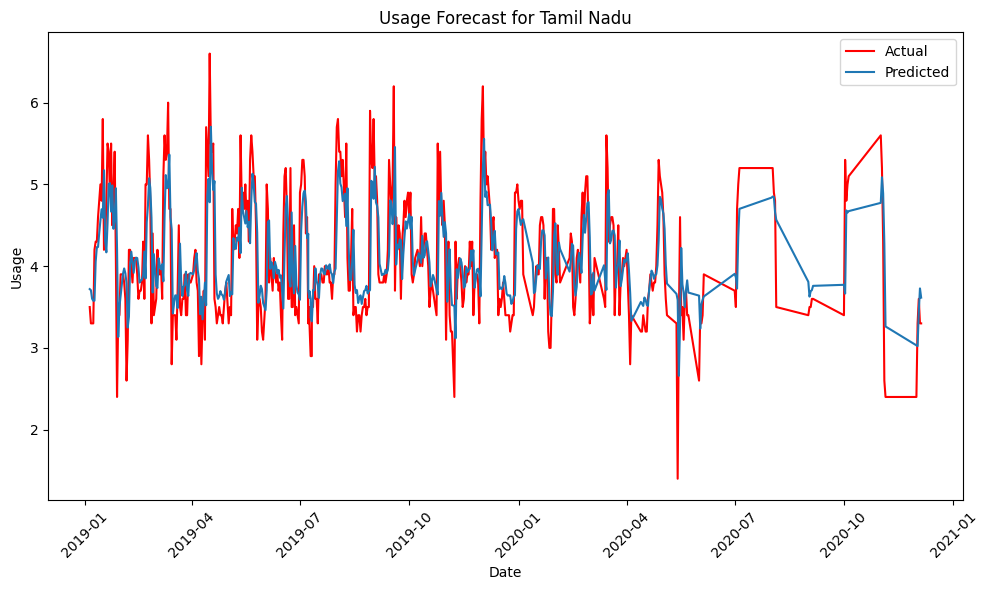

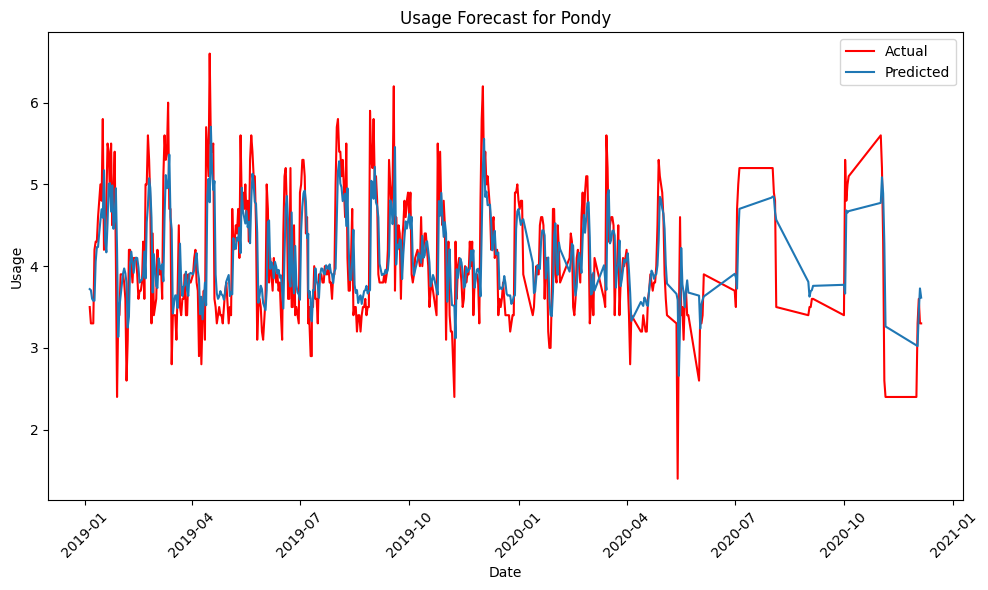

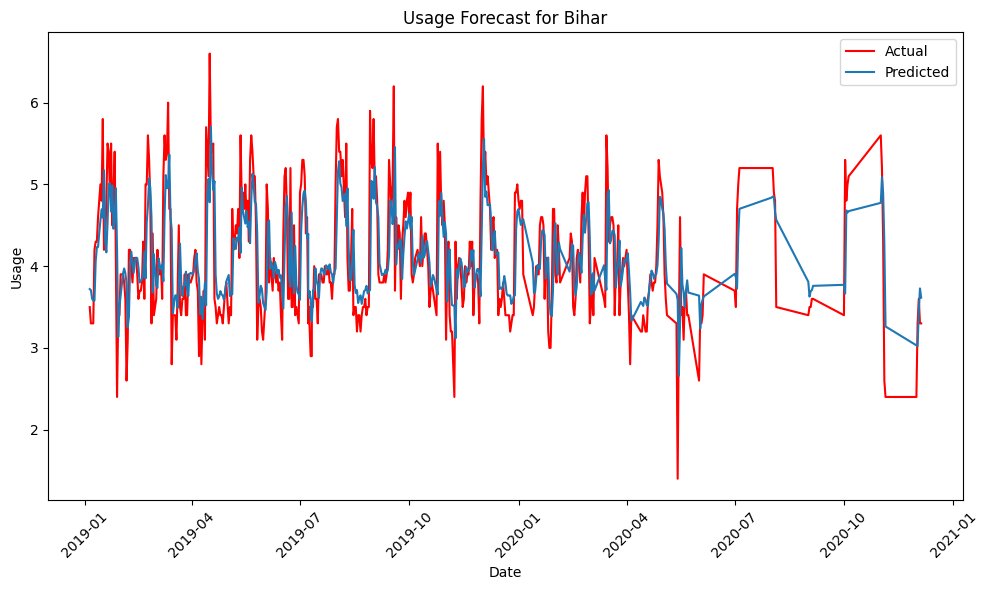

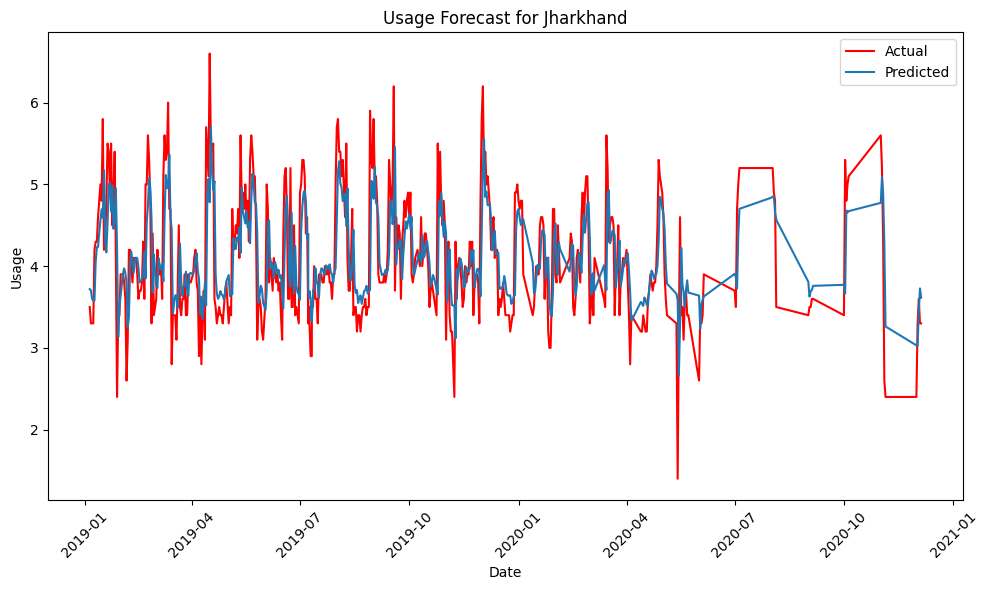

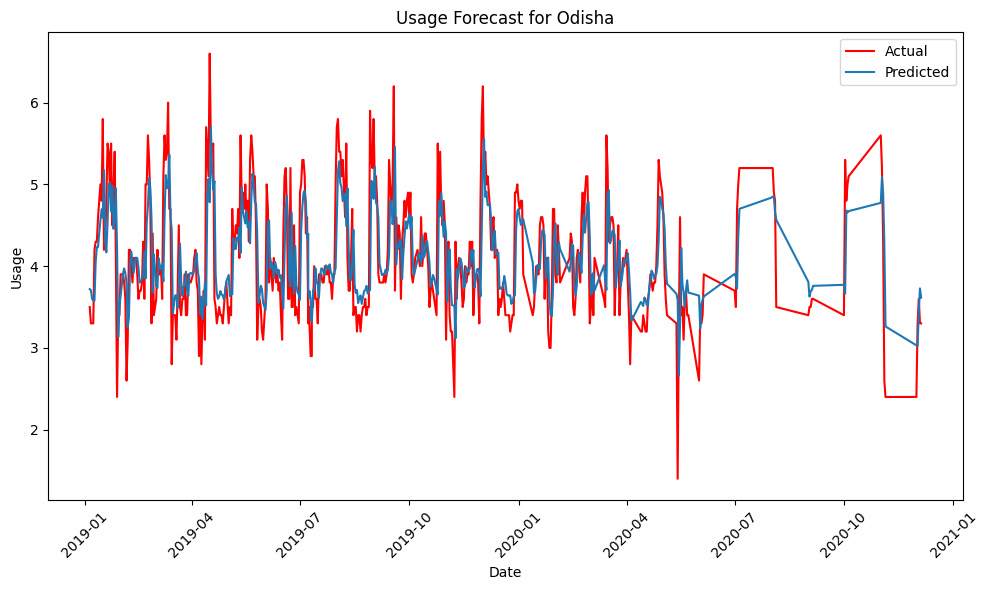

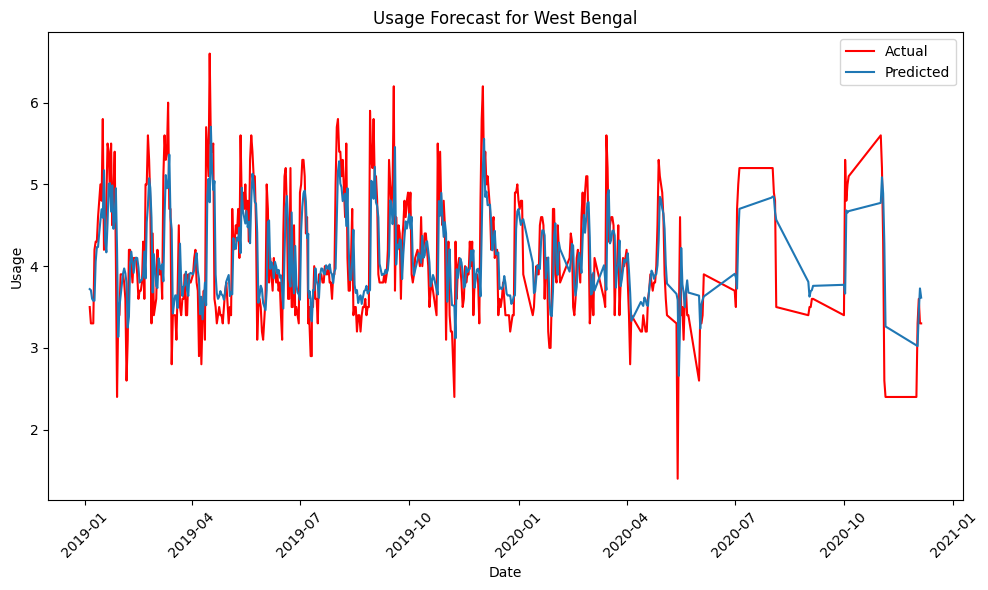

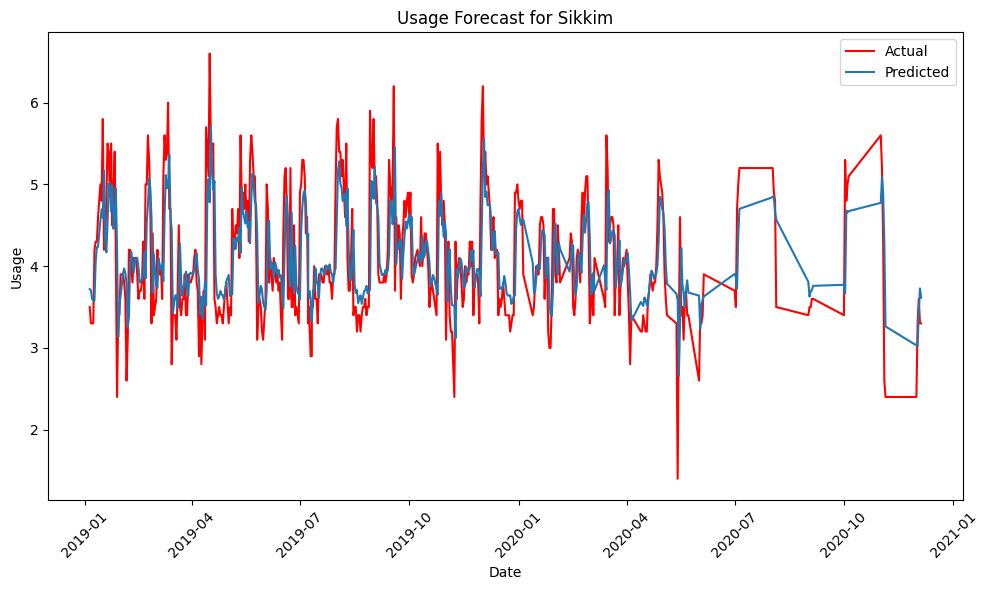

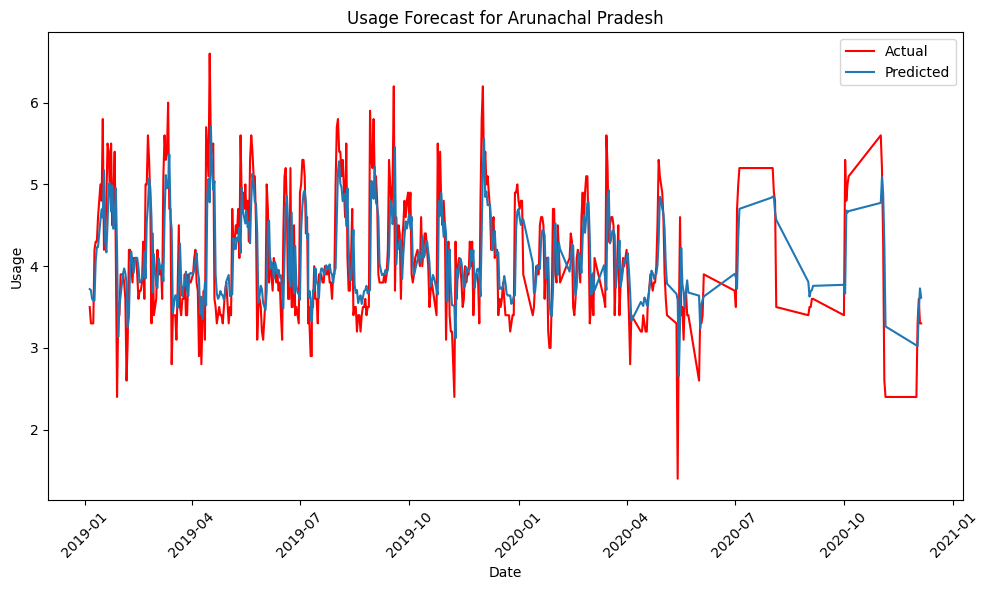

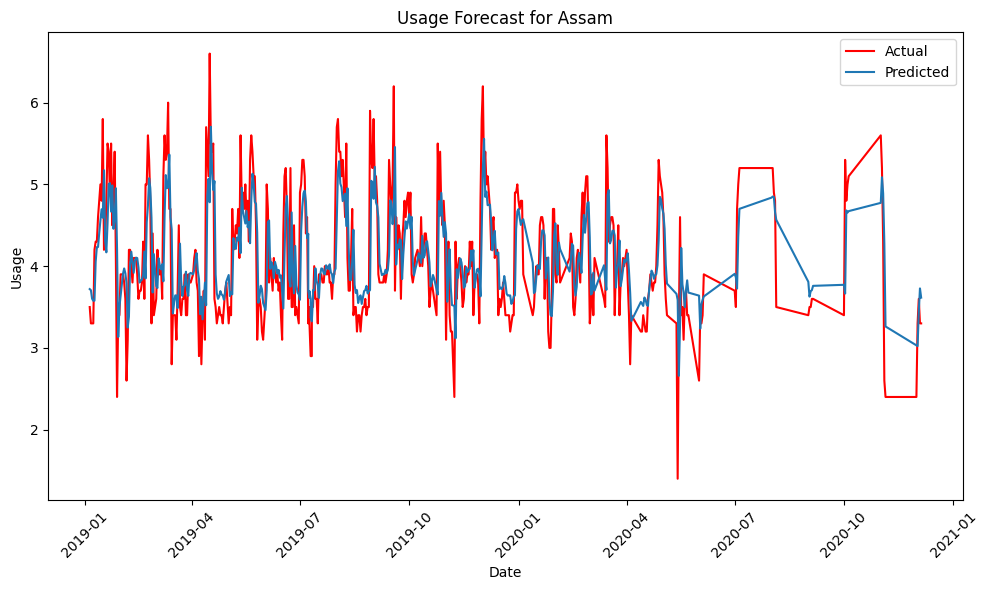

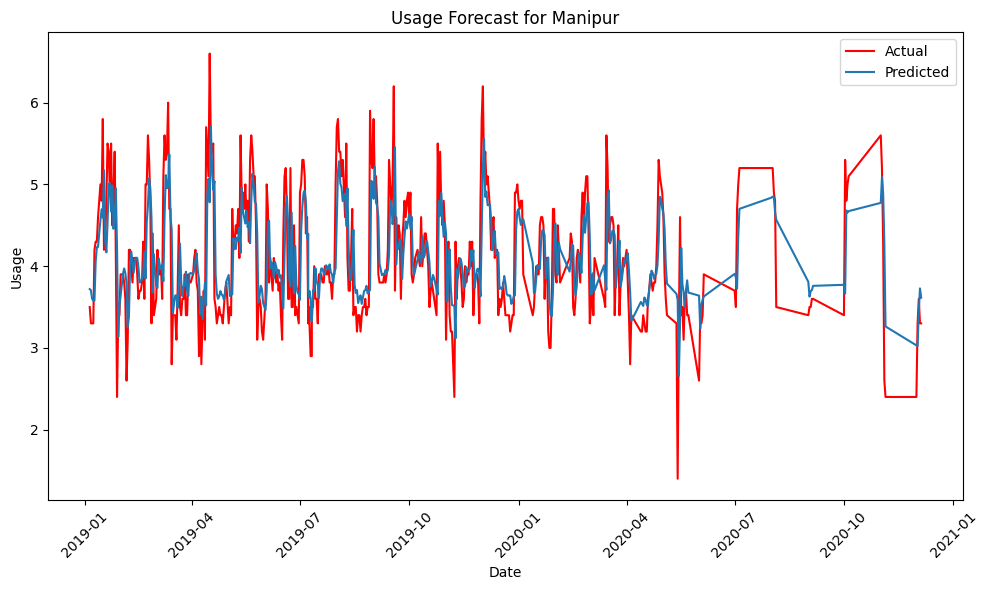

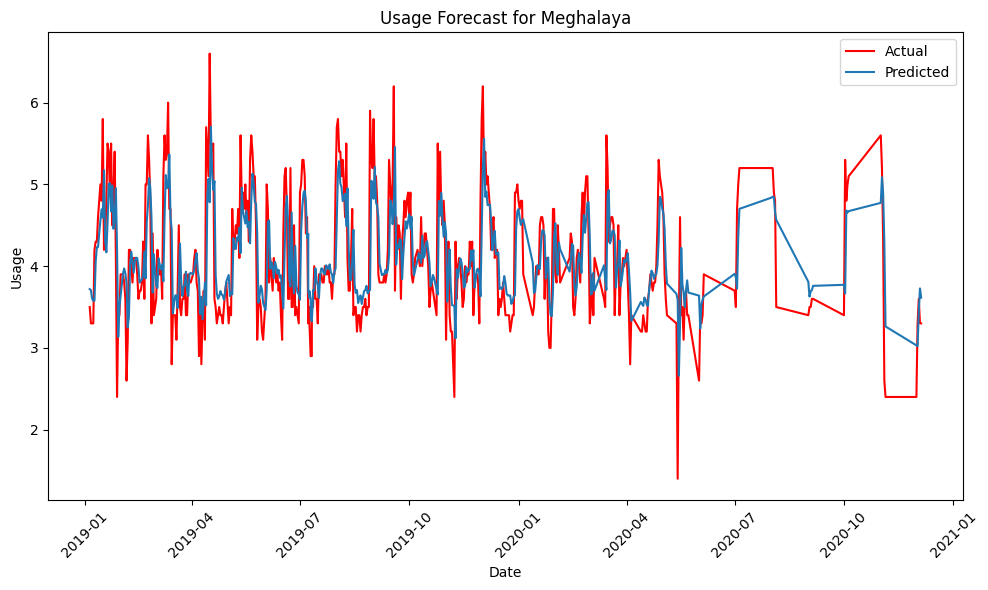

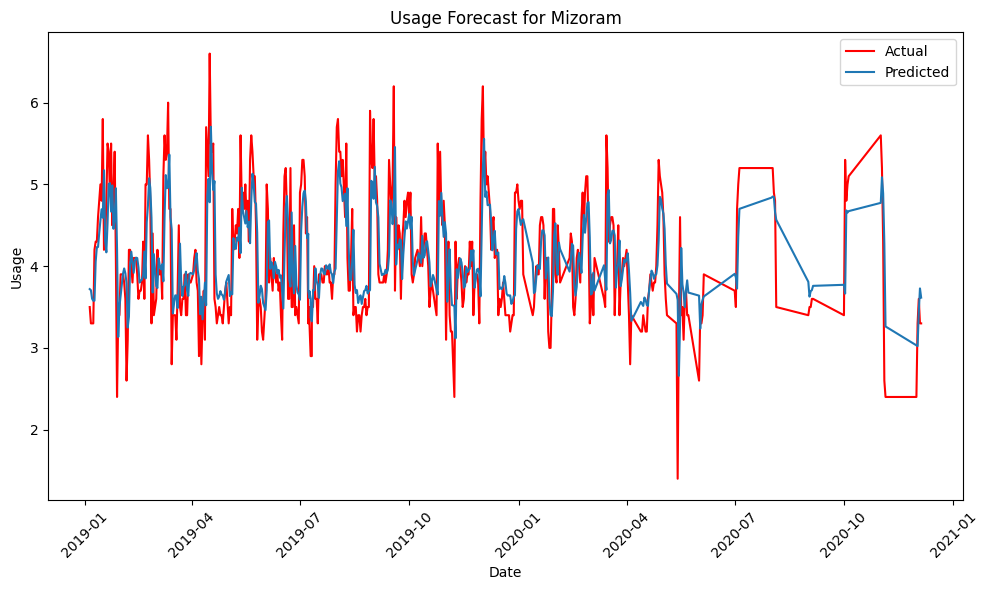

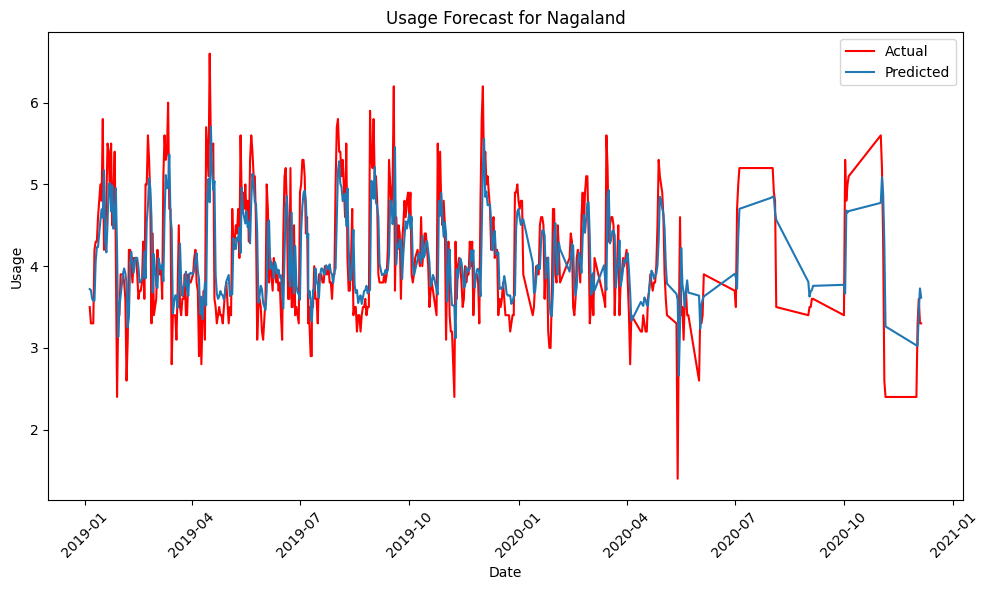

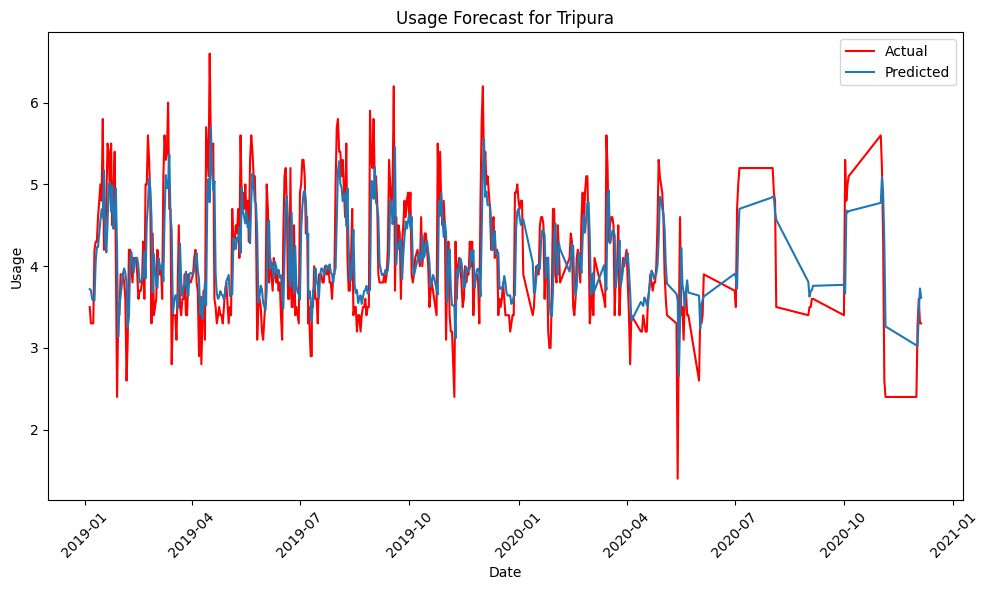

In [ ]:
import matplotlib.pyplot as plt

# Iterate over the LSTM models for each state
for state, lstm_model in state_lstm_forecasts.items():
    # Plot the actual usage data
    plt.figure(figsize=(10, 6))
    plt.plot(state_df['Dates'].iloc[n_steps:], y_test, label='Actual', color='red')

    # Plot the predicted values
    plt.plot(state_df['Dates'].iloc[n_steps:], predictions, label='Predicted')

    # Set plot title and labels
    plt.title(f'Usage Forecast for {state}')
    plt.xlabel('Date')
    plt.ylabel('Usage')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
